# An Investigation of The Perturbed Potential Square Well #
Evan M. R. Petrimoulx  
PHYS-4100  
Dr. C. Licciardi  
March 30th 2024

In this paper I investigate multiple different perterbations of the famous infinite square well problem in Quantum Mechanics. I utilize the theory for first order corrections for both the Energy and Wavefunctions that describe the system and create a program in python to calculate and model how the perterbations change the system compared to the well known square well solutions. I successfully show the energy shift for each value of $n$ from $n = 1$ to $n = 10$ for the perturbed well and provide visual representations of the probability and the state of the system. The program designed below is capable of calculating any perturbed state on the square well so long as the perturbed hamiltonian does not operate on $\Psi$. This exercise provides insight to the change in state that can occur given a small change to a well known system.

## Theory ##  
The infinite square well is a well studied scenario within quantum mechanics that described how a particle should behave when stuck in a potential *well*. The function that described this well can be written mathematically as follows:

$$ 
V(x) = 
    \begin{cases}
        \infty ,\; x \leq 0\\
        0 ,     \; 0 < x < a\\
        \infty ,\; x \geq a
    \end{cases}
$$

We can use this potential as the potential in our Hamiltonian and solve for the possible Energy Eigenstates and Wavefunctions using the Schrödinger Equation:

$$
\hat{H} \psi_n(x) = E_n \psi_n(x)
$$

Where $\hat{H}$ is:

$$
    \hat{H} = - \frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x)
$$

Which has solutions:

$$
\begin{align*}
    E_n &= \frac{\hbar^2 \pi^2 n^2}{2m a^2} &  \hspace{1cm} \text{and} \hspace{1cm} \psi_n(x) &= \sqrt{\frac{2}{a}} \sin \left(\frac{n \pi x}{a} \right)
\end{align*}
$$

Where $a$ is the width of the well.

We now wish to add a tiny change to the infinite well. We can approximate the tiny change or "bump" we add to the well using perturbation theory. We 
then redefine our Hamiltonian as:

$$
\hat{H} = \hat{H}^{(0)} + \lambda \hat{H}^{(1)} + \lambda^2 \hat{H}^{(2)} + \dots
$$

Where $\lambda$ is some sufficiently small quantity. The first order correction to this tiny bump in the potential well can be calculated with:

$$
\begin{align*}
    E_n^{(1)} &= \langle \psi_n^{(0)} \vert \hat{H}^{(1)} \vert \psi_n^{(0)} \rangle & \hspace{1cm} \text{and} \hspace{1cm} & & \vert \psi_n^{(1)} \rangle &= \sum_{m \neq n} \frac{\langle \psi_m^{(0)} \vert \hat{H}^{(1)} \vert \psi_n^{(0)} \rangle}{E_n^{(0)} - E_m^{(0)}} \vert \psi_m^{(0)} \rangle
\end{align*}
$$

These are the formulas which will be programmed later to produce out answer for any small change in potential.

## Method ## 
To start we implement two libraries, numpy which is used for aiding our numerical calculations, and matplotlib - pyplot for our visual graphs.

In [177]:
import numpy as np 
from matplotlib import pyplot as plt

We then define some important fundamental constants needed to describe our Hamiltonian:

In [178]:
hbar = 6.5821220E-16 # [eV s]
electron_charge = 1.602E-19 # [C]
mass_electron = 9.11E-31 # [kg]

We create a function $GetWaveFn(x, width)$ to generate the solutions for the unperturbed wavefunction for values of $n$ from $1$ to $10$. It takes in two arguments, $x$ which is an array containing values from 0 (left side of the well) to $a$ (right side of the well), and $width$ which is the width of the well $(a)$.

In [179]:
def GetWaveFn(x, width):
    wavefunction = []
    for i in range(1, 11):
        wavefunction.append(np.sqrt(2/width) * np.sin(np.pi * i * x/ width))     
    
    return wavefunction

Similarly, we create another function $GetEnergies(width)$ to generate the eigenenergies for the unperturbed system for values of $n$ from $1$ to $10$. It takes in an arguement $width$ which is the width of the well ($a$). This is needed to satisfy the solution for the eigenvalues of the hamiltonian.

In [180]:
# Energies for particle in a box for n = 1, 2, 3, ... 10 #
def GetEnergies(width):
    energy = []
    for i in range(1, 11):
        energy.append(i**2 * hbar**2 * np.pi**2 / (2 * mass_electron * width))
    return energy

We also need a few functions to calculate the first order corrections to the Energy and Wavefunction of the perturbed system. We define both below. $EnergyCorrection(wavefunction, potential, x)$ calculates:

$$
\langle \psi \vert V(x) \vert \psi \rangle = \int_{-\infty}^\infty \psi^*(x) V(x) \psi(x) dx 
$$

Since the wavefunction must go to zero when the potential is infinite, can instead write:

$$
\langle \psi \vert V(x) \vert \psi \rangle = \cancel{\int_{-\infty}^0 \psi^*(x) V(x) \psi(x) dx}^0 + \int_{0}^a\psi^*(x) V(x) \psi(x) dx + \cancel{\int_a^\infty \psi^*(x) V(x) \psi(x) dx}^0
$$
So:
$$
\langle \psi \vert V(x) \vert \psi \rangle = \int_{0}^{a} \psi^*(x) V(x) \psi(x) dx 
$$
Which is calculated in the function below utilizing $np.trapz()$, which is a feature of the $numpy$ library to calculate integrals. We pass in the integrand and $x$ into the integral specifying the function we would like to integrate and the range we are integrating over.

$GetWaveCorrection(wavefunction, x, potential, energy)$ calculates:

$$
\begin{align*}
    \hspace{1cm} & & \vert \psi_n^{(1)} \rangle &= \sum_{m \neq n} \frac{\langle \psi_m^{(0)} \vert \hat{H}^{(1)} \vert \psi_n^{(0)} \rangle}{E_n^{(0)} - E_m^{(0)}} \vert \psi_m^{(0)} \rangle
\end{align*}
$$

Which takes in the wavefunction, an array of values between $0$ and $a$, the potential function which is perturbing the system, and the energies of the unperturbed system.


In [181]:
def EnergyCorrection(wavefunction, potential, x):
    integrand = wavefunction * potential * wavefunction
    return np.trapz(integrand, x)

In [182]:
def GetWaveCorrection(wavefunction, x, potential, energy):
    correction = []
    
    for n in range(0, 10):
        temp = 0
        for m in range(0, 10):
            if(n != m):
                numerator = np.trapz(wavefunction[m] * potential * wavefunction[n], x)
                denominator = energy[n] - energy[m]
                temp = temp + numerator / denominator * wavefunction[m]
        correction.append(temp)
        
    return correction

Listed Below are two functions which are used to create the graphs for the energies and wavefunctions as well as the probabilities. They utilize the matplotlib.pyplot library to color, label, title, and generate the graphs. The $MakeGraph$ function takes multiple arguments and is used to plot both the wavefunctions and probabilities for the unperturbed and perturbed states. The unperturbed and perturbed states are plotted on the same graphs for comparison. The Energy required its own function since I wanted to show the well the discrete energy levels were contained in and the perturbed function at the same time as the eigenenergies.

In [183]:
def MakeGraph(title, x, y1, color1, y2, color2, label1, label2, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y1, color = color1, label = label1)
    plt.plot(x, y2, color = color2, label = label2)
    plt.minorticks_on()
    plt.tick_params(which = 'minor', direction = 'in', bottom = True, top = True, left = True, right = True, length = 4)
    plt.tick_params(length = 7, bottom = True, top = True, left = True, right = True)
    plt.tick_params(axis = 'both', direction = 'in')
    plt.ticklabel_format(style = "scientific", useMathText=True, axis="x", scilimits=(0,0))
    plt.legend()
    plt.show()
    
    return 0

In [184]:
def MakeEnergyGraph(x, energy, corrected_energy, potential):
    # Plots the energy inside the well #
    for i in range(0, 10):
        plt.plot(x, energy[i] + x*0, color = 'black')
        plt.plot(x, corrected_energy[i] + x*0, color = 'red')

    # Plots the Well #
    well_height = np.linspace(0, 25, 1000) # Used only for visual of the well
    plt.plot(0 * x, well_height, color = 'blue')
    plt.plot(0 * x + 10, well_height, color = 'blue')
    plt.plot(x, potential)

    # Only here to show the labels correctly for all Corrected and normal Energies  - Avoid redundant labelling #
    plt.plot(x, 0*x, color = 'red', label = f'$E_n^{(1)}$') 
    plt.plot(x, 0*x, color = 'black', label = f'$E_n^{(0)}$') 

    # Graph Style #
    plt.title('Energies inside of the Perturbed Potential Well')
    plt.xlabel("Width")
    plt.ylabel(f"$E_n$")
    plt.minorticks_on()
    plt.tick_params(which = 'minor', direction = 'in', bottom = True, top = True, left = True, right = True, length = 4)
    plt.tick_params(length = 7, bottom = True, top = True, left = True, right = True)
    plt.tick_params(axis = 'both', direction = 'in')
    plt.ticklabel_format(style = "scientific", useMathText=True, axis="x", scilimits=(0,0))
    plt.legend()
    plt.show()
    
    return 0

Here we define the width of the well as well as the linspace for x which is the array mentioned previously that contained many values from $0$ to $a$. These are placed in a separate code block for easy modification and editing for different scenarios.

In [185]:
# Width of the potential well #
wellWidth = 10
x = np.linspace(0, wellWidth, 1000)

Similarly here, we assign variables to the width and position of the perturbed potential as well as create an array of values for the potential and wavefuction that will be used to calculate the perturbation corrections.

The potential being used in this example is:

$$
    V(x) = \frac{-1}{\sigma \sqrt{2\pi}} \exp \left(\frac{{-(x - \mu)^2}}{(2\sigma)^2} \right)
$$

Where $\sigma$ is the parameter which controls the width of the perturbed potential, and $\mu$ is the position where the perturbation is located. Currently the height is set to 0.05 which creates a very tall gaussian packet, and $\mu$ is 5, therefore centered in the middle of our well of width 10.

In [186]:
# Generate the potential and wavefunction #
wavefunction = GetWaveFn(x, wellWidth)

widthOfPotential = 0.05 # Width of Gaussian Perturbed Potential 
PotentialShift = 5      # Position (Left or Right of Origin) of Gaussian Perturbed Potential
potential = -1 / (widthOfPotential * np.sqrt(2*np.pi)) * np.exp(-(x-PotentialShift)**2 / (2 * widthOfPotential**2))


I now generate the energy and first order correction and sum them to get the new perturbed energy.

In [187]:
# Get the energy and first order corrected energy, add them for the total new energy #
energy = GetEnergies(wellWidth)
energy_firstOrder = EnergyCorrection(wavefunction, potential, x)
corrected_energy = energy + energy_firstOrder

The same thing is done here for the wavefunctions and their corrections are added for all values of $n$ from $n = 1$ to $n = 10$.

In [188]:
# Find the corrected wavefunction
wavefunction_firstOrder = GetWaveCorrection(wavefunction, x, potential, energy)
corrected_wavefunction = []
for i in range(0, 10):
    corrected_wavefunction.append(wavefunction_firstOrder[i] + wavefunction[i])

I then ensure that the perturbed wavefunction is normalized in order to be able to correctly compare it to the infinite well solution. This is done by implementing the following equation:

$$
\vert \psi_{n}^{(1)} \rangle_\text{normalized} = \int_0^{a} \frac{\vert \psi_n^{(1)} \rangle}{\sqrt{\langle\psi_n^{(1)} \vert \psi_n^{(1)} \rangle}} dx
$$

In [189]:
# Normalize #
for i in range(0, 10):
    corrected_wavefunction[i] = corrected_wavefunction[i] / (np.sqrt(np.trapz(corrected_wavefunction[i]**2, x)))


Taking the normalized wavefunctions I now compute the probabilities for each state by computing $ P(\psi(x)) = \vert \psi_n(x) \vert^2 $

In [190]:
# Get Probability Distributions #
waveFnProb = []
CorrectedWaveFnProb = []
for i in range(0, 10):
    waveFnProb.append(wavefunction[i]**2)
    CorrectedWaveFnProb.append(corrected_wavefunction[i]**2)


Finally now that I calculated everything required, we pass the corrections into the graphing functions to get our output.

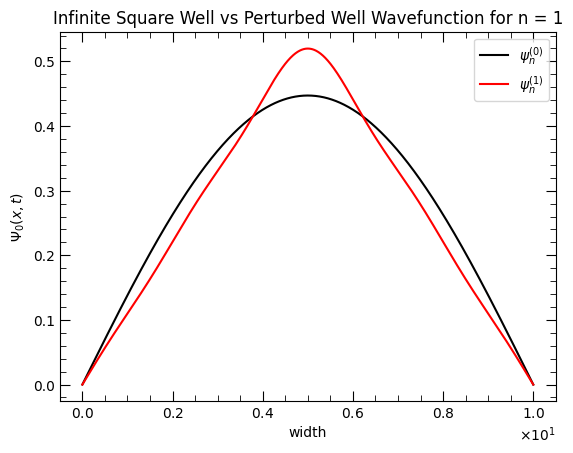

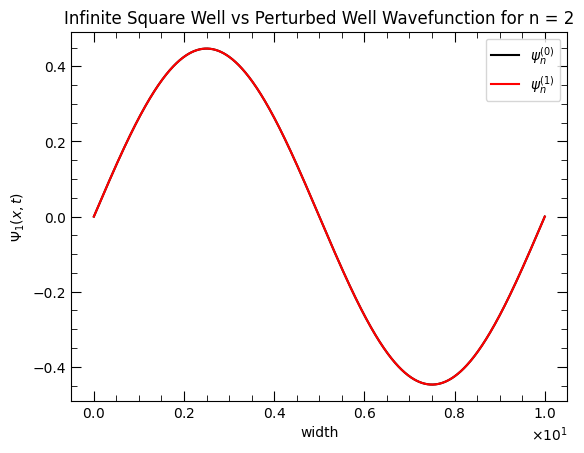

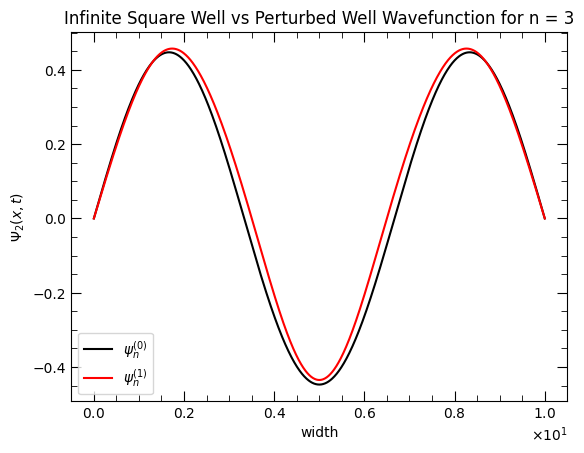

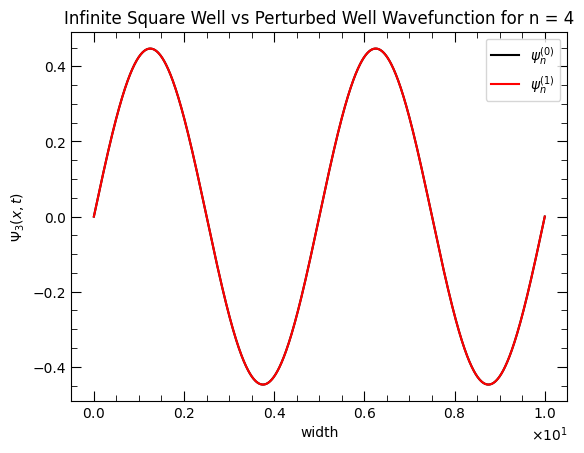

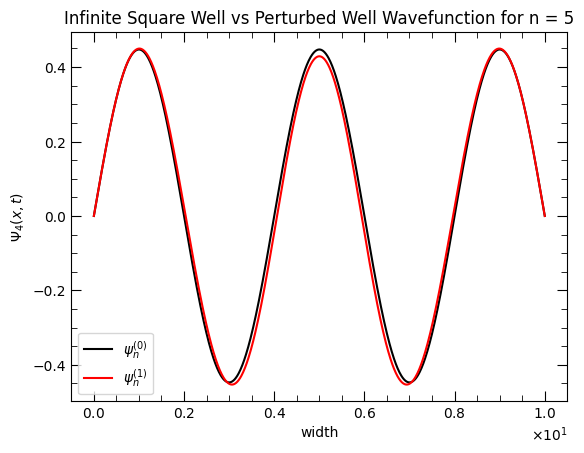

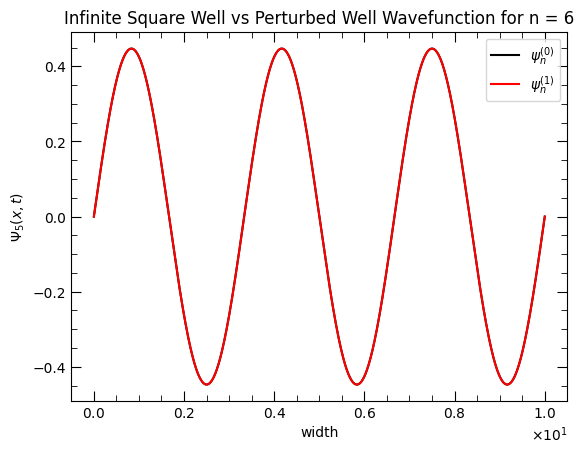

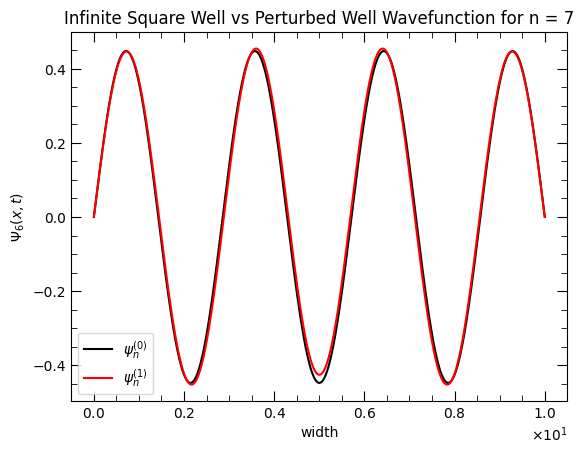

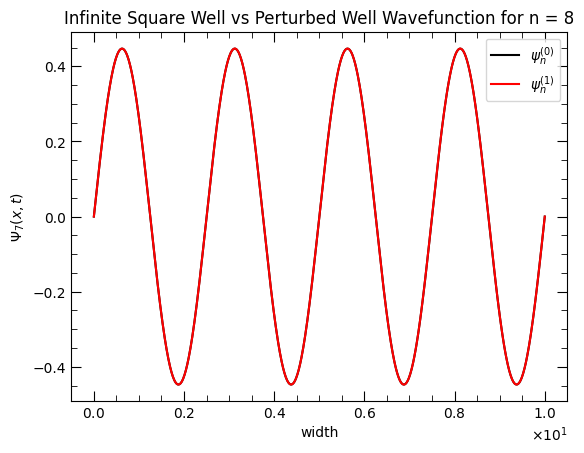

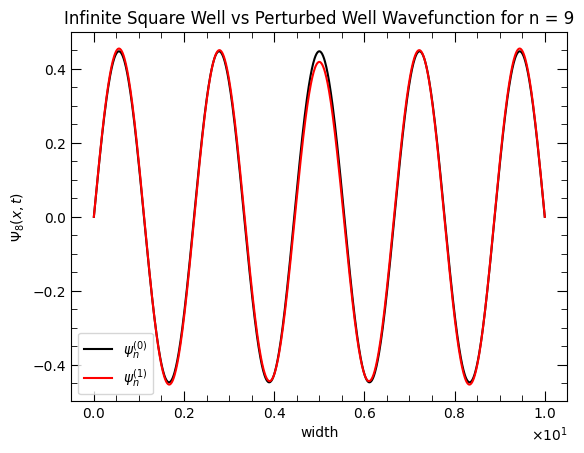

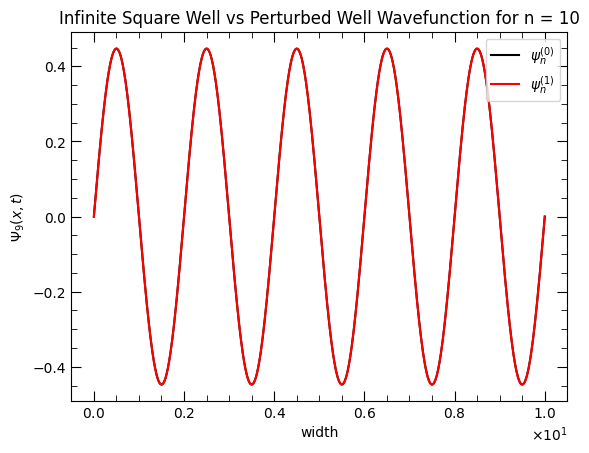

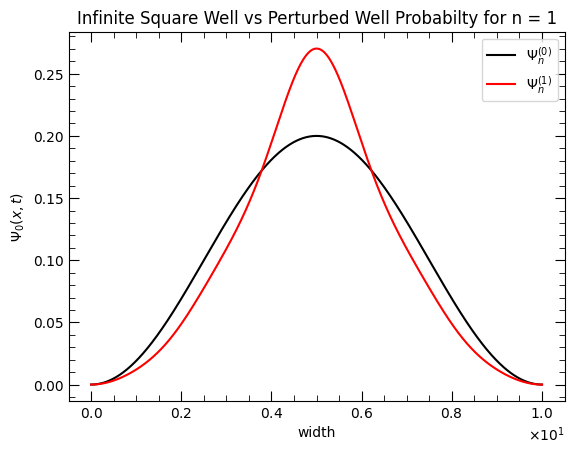

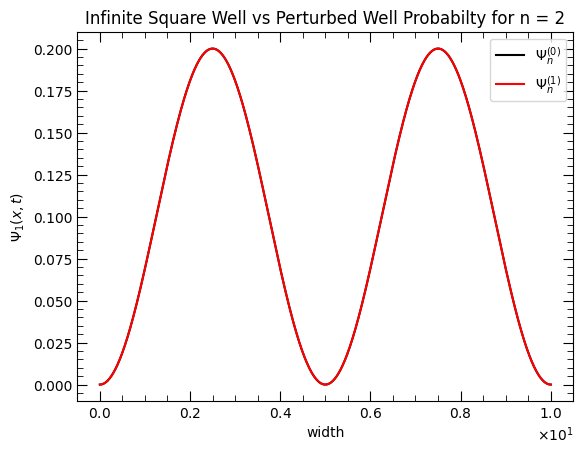

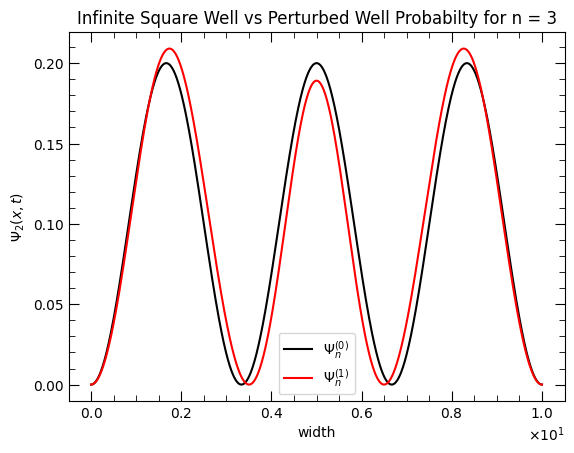

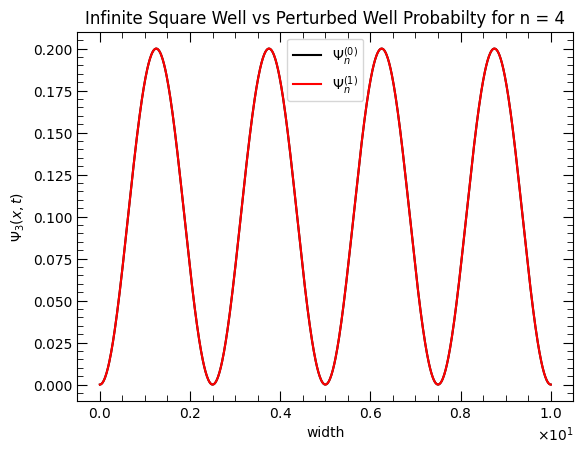

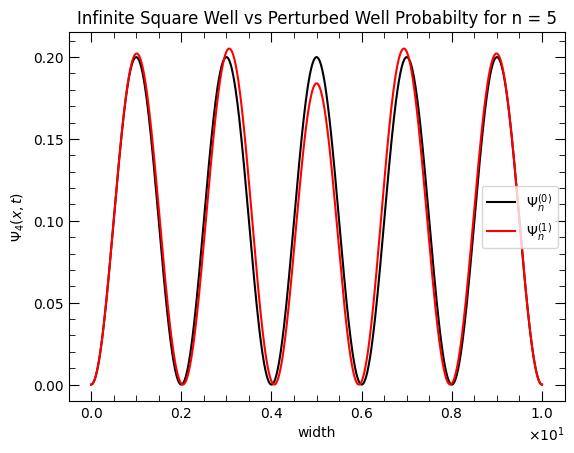

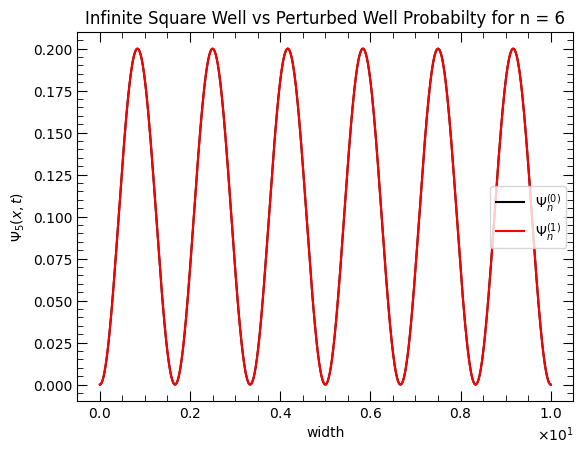

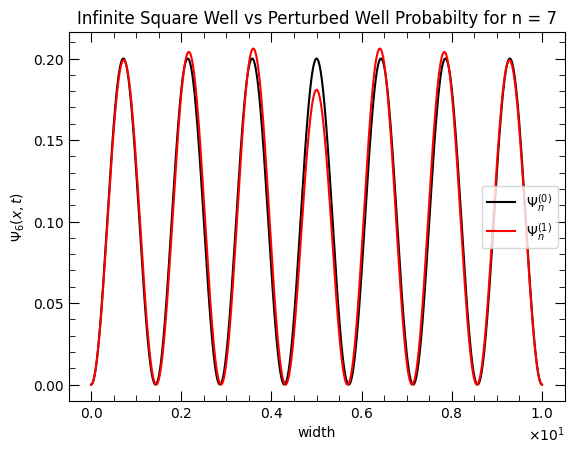

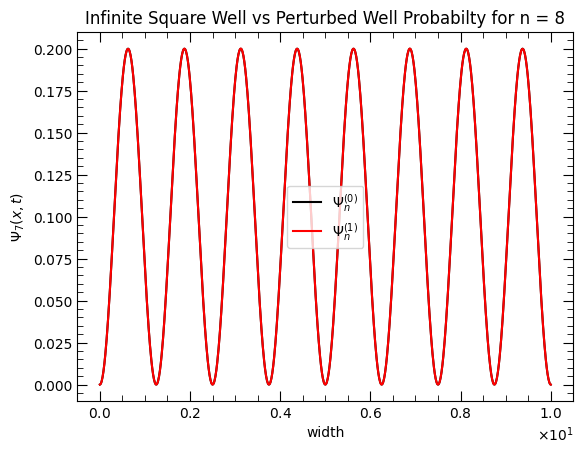

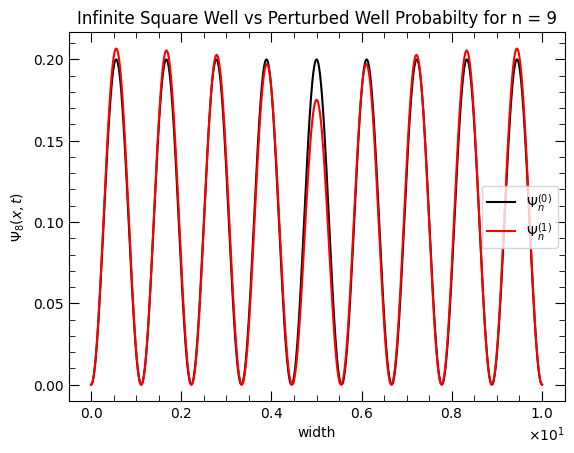

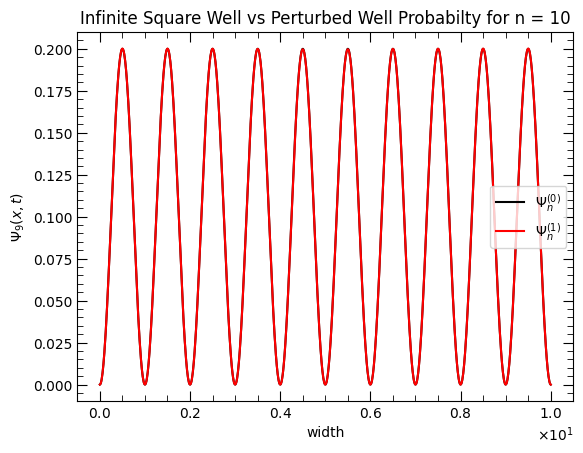

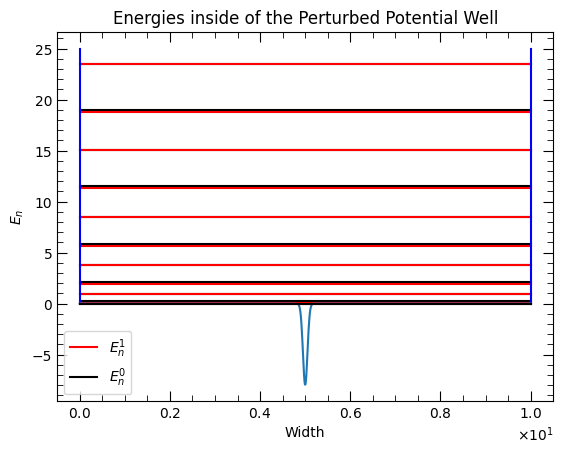

0

In [191]:
# Create Wavefunction Graphs #
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Wavefunction for n = {i+1}',
        x,
        wavefunction[i],
        'black',
        corrected_wavefunction[i],
        'red',
        r'$\psi_n^{(0)}$',
        r'$\psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )
    
    
# Create Probability Density Graphs
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Probabilty for n = {i+1}',
        x,
        waveFnProb[i],
        'black',
        CorrectedWaveFnProb[i],
        'red',
        r'$\Psi_n^{(0)}$',
        r'$\Psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )


# Create Energy Graph #
MakeEnergyGraph(x, energy, corrected_energy, potential)

## Results ##
In this section I analyze the outputs from the designed program for various perturbed potentials. The first result in shown by running the cell above in the method section. By re-runnning the code above with the potential shifted to one side of the well we get:
$$
    V(x) = \frac{-1}{0.05 \sqrt{2\pi}} \exp \left(\frac{{-(x-8)^2}}{(2* 0.05)^2} \right)
$$

Where the main change is that the gaussian perturbation is no longer centered.

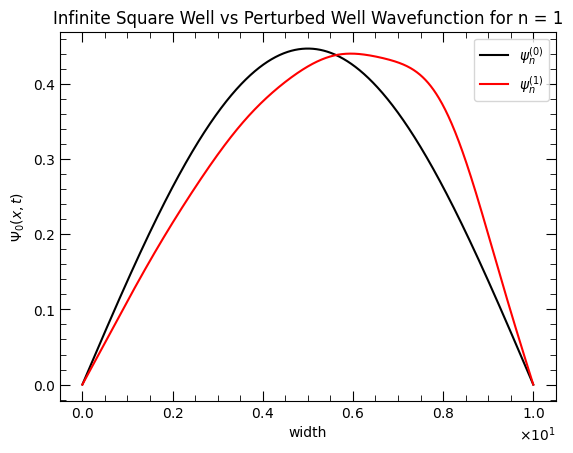

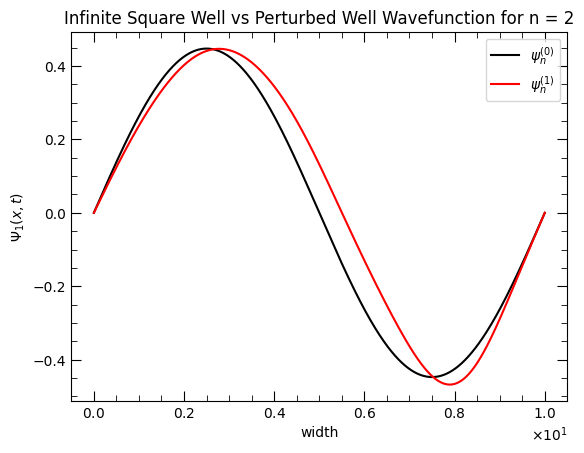

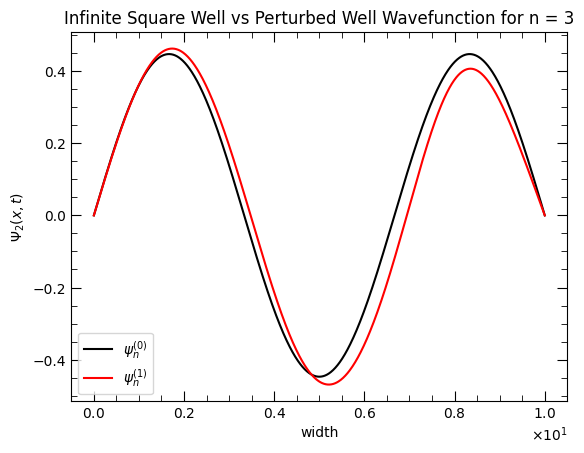

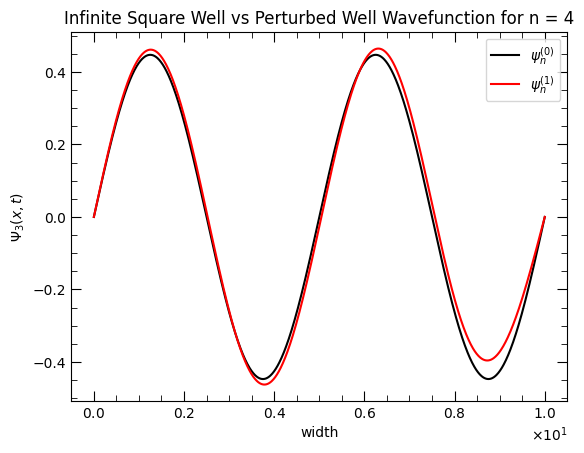

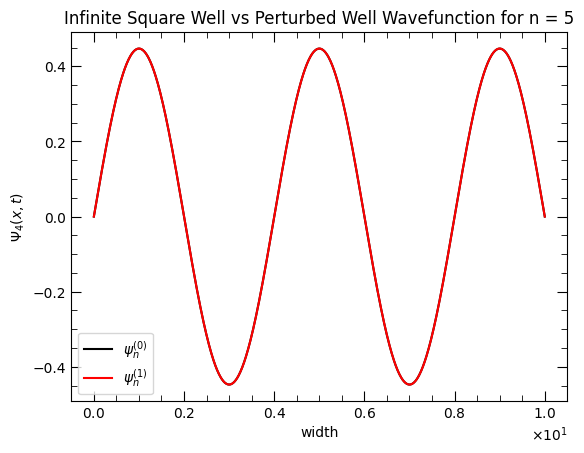

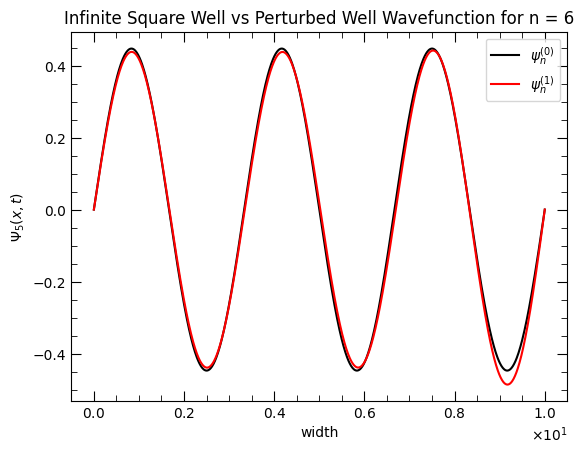

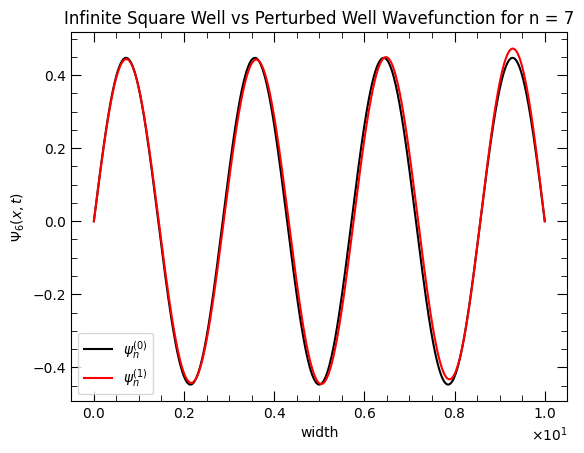

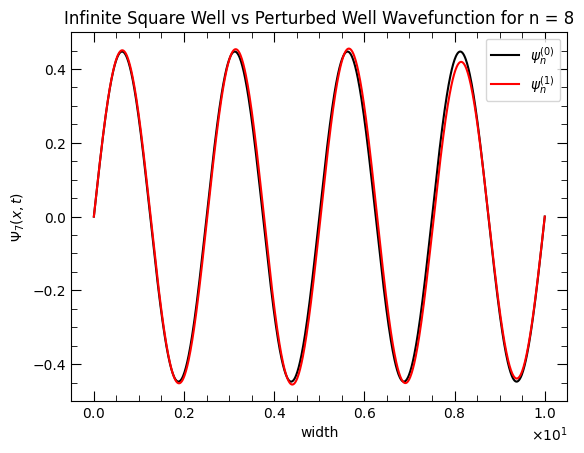

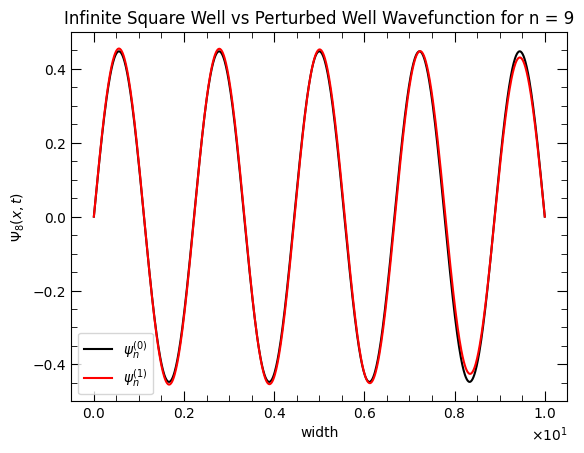

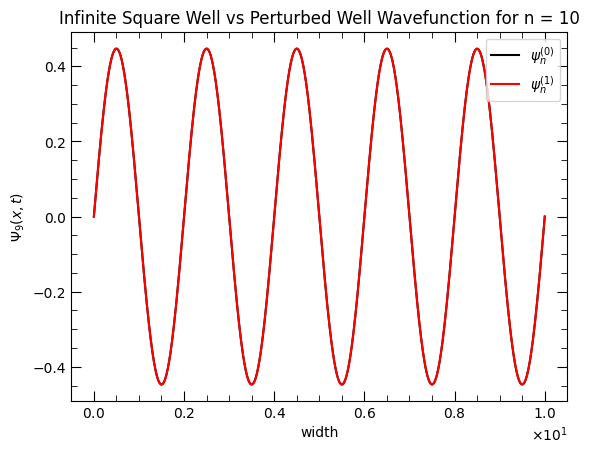

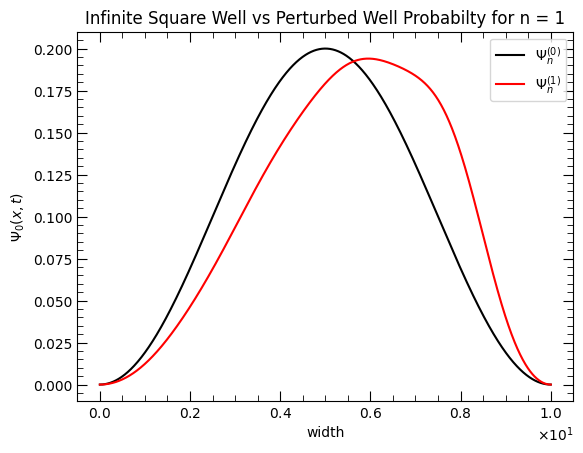

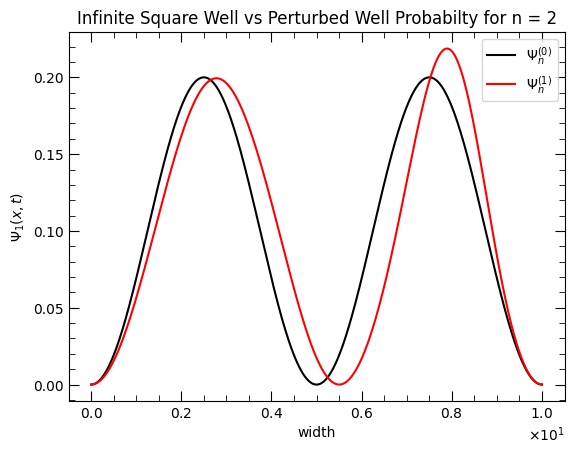

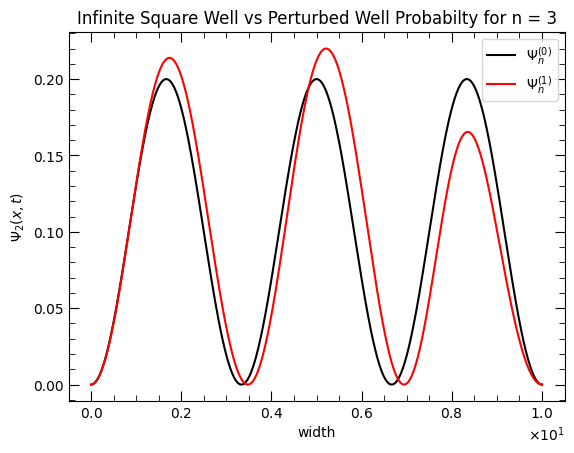

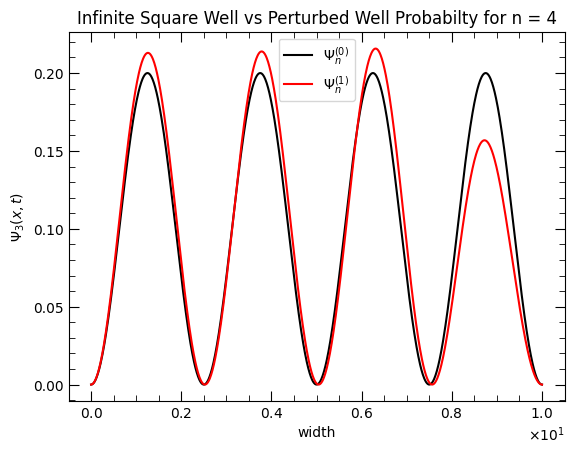

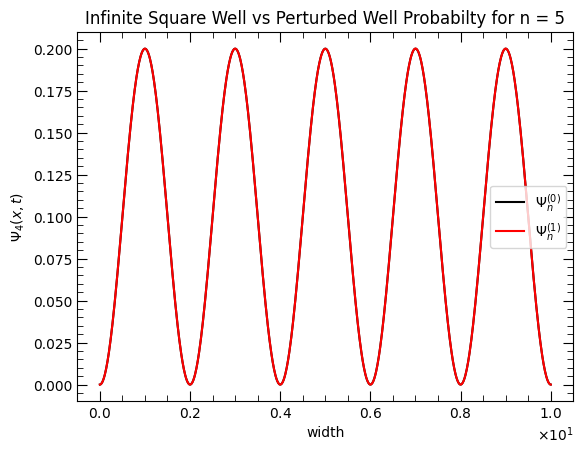

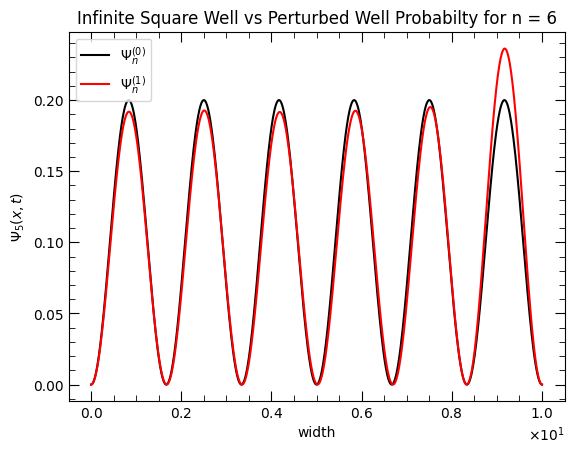

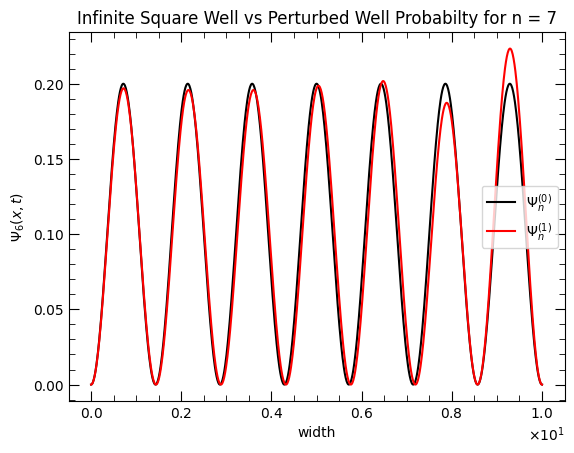

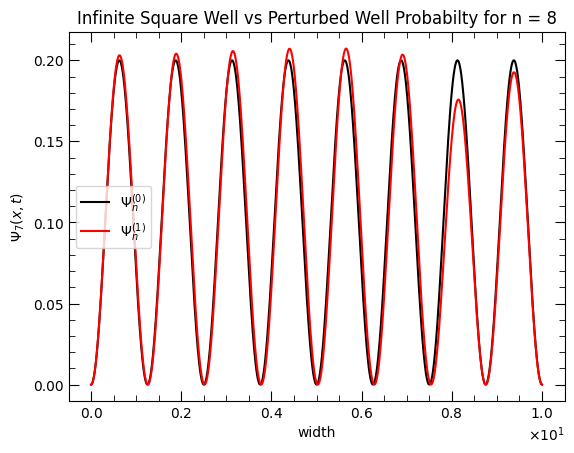

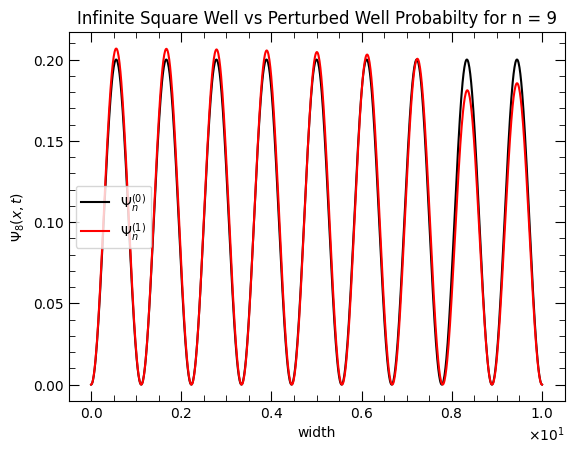

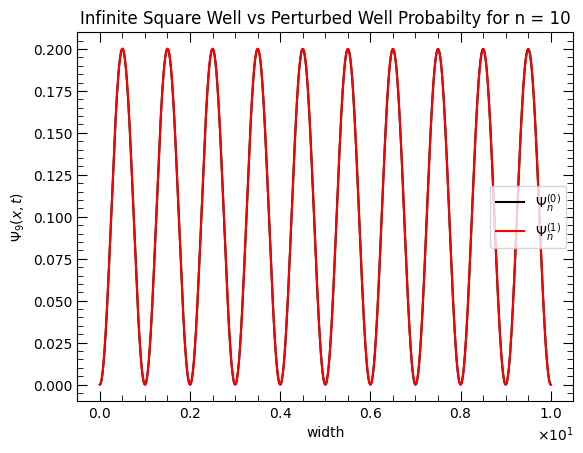

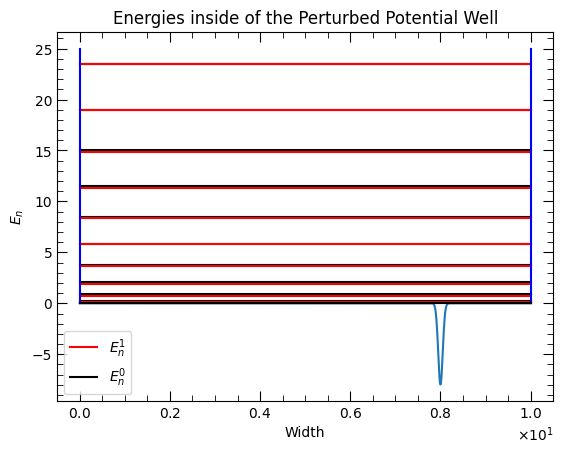

0

In [192]:
# Width of the potential well #
wellWidth = 10
x = np.linspace(0, wellWidth, 1000)


# Generate the potential and wavefunction #
wavefunction = GetWaveFn(x, wellWidth)

widthOfPotential = 0.05 # Width of Gaussian Perturbed Potential 
PotentialShift = 8      # Position (Left or Right of Origin) of Gaussian Perturbed Potential
potential = -1 / (widthOfPotential * np.sqrt(2*np.pi)) * np.exp(-(x-PotentialShift)**2 / (2 * widthOfPotential**2))


# Get the energy and first order corrected energy, add them for the total new energy #
energy = GetEnergies(wellWidth)
energy_firstOrder = EnergyCorrection(wavefunction, potential, x)
corrected_energy = energy + energy_firstOrder


# Find the corrected wavefunction
wavefunction_firstOrder = GetWaveCorrection(wavefunction, x, potential, energy)
corrected_wavefunction = []
for i in range(0, 10):
    corrected_wavefunction.append(wavefunction_firstOrder[i] + wavefunction[i])


# Normalize #
for i in range(1, 10):
    corrected_wavefunction[i] = corrected_wavefunction[i] / (np.sqrt(np.trapz(corrected_wavefunction[i]**2, x)))


# Get Probability Distributions #
waveFnProb = []
CorrectedWaveFnProb = []
for i in range(0, 10):
    waveFnProb.append(wavefunction[i]**2)
    CorrectedWaveFnProb.append(corrected_wavefunction[i]**2)


# Create Wavefunction Graphs #
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Wavefunction for n = {i+1}',
        x,
        wavefunction[i],
        'black',
        corrected_wavefunction[i],
        'red',
        r'$\psi_n^{(0)}$',
        r'$\psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )


# Create Probability Density Graphs
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Probabilty for n = {i+1}',
        x,
        waveFnProb[i],
        'black',
        CorrectedWaveFnProb[i],
        'red',
        r'$\Psi_n^{(0)}$',
        r'$\Psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )


# Create Energy Graph #
MakeEnergyGraph(x, energy, corrected_energy, potential)

We can also change the width of the gaussian perturbation, instead of making a very skinny and tall distribution, we can instead create a widespread and shallow potential. Setting the width $(\sigma)$ to $1$ we find:

$$
    V(x) = \frac{-1}{6 \sqrt{2\pi}} \exp \left(\frac{{-(x - 5)^2}}{(2* 6)^2} \right)
$$

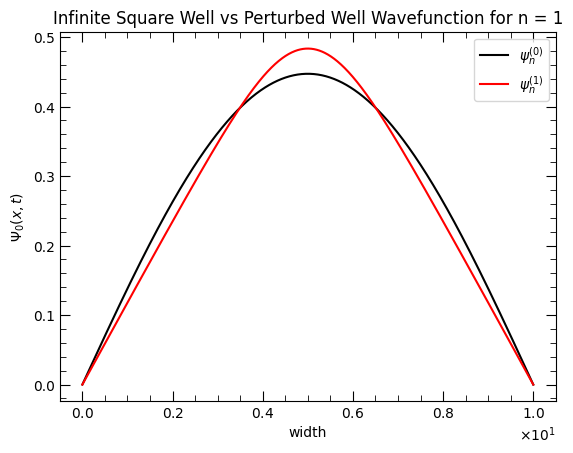

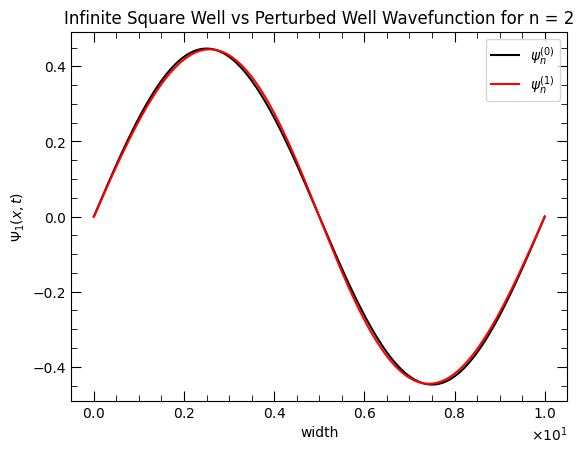

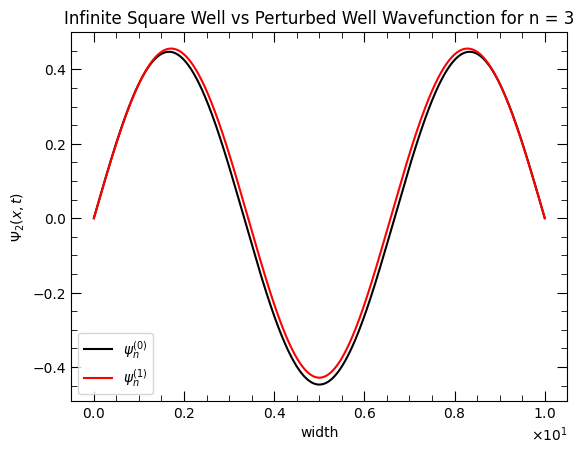

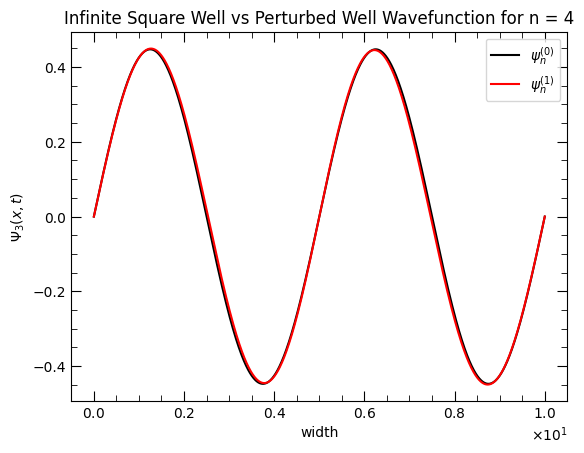

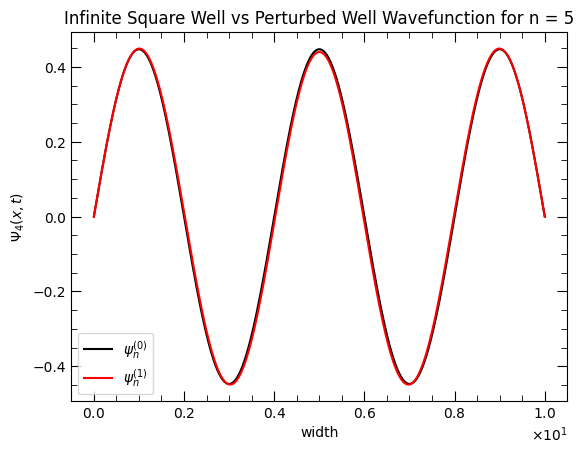

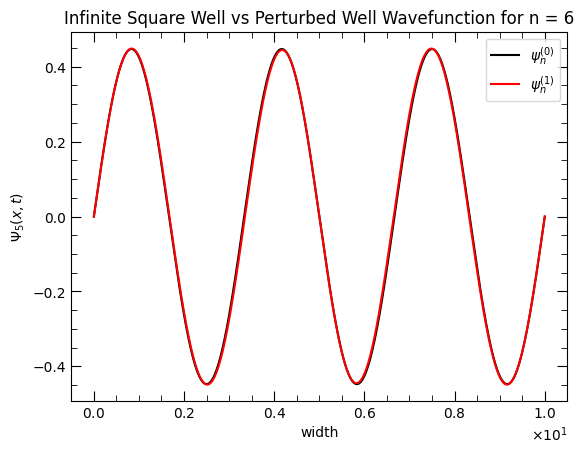

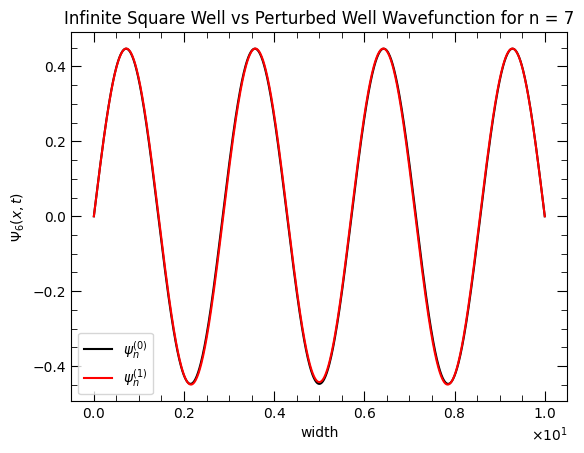

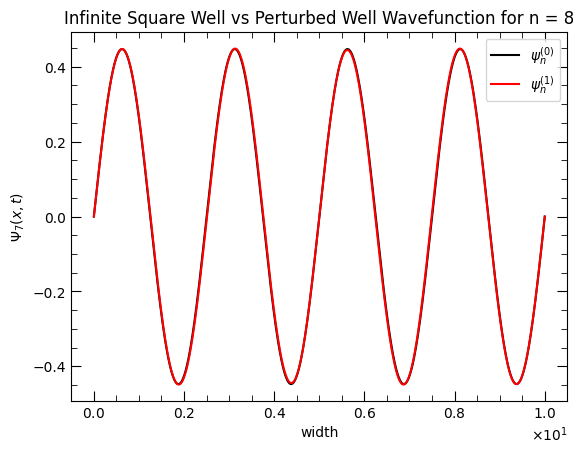

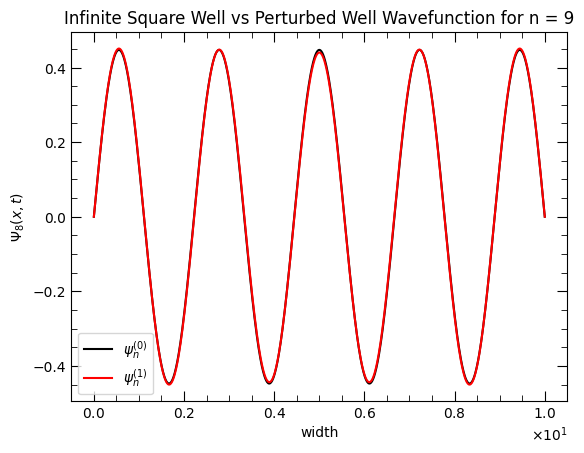

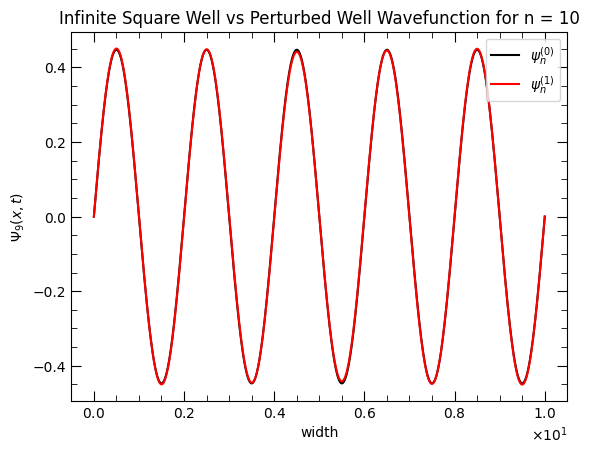

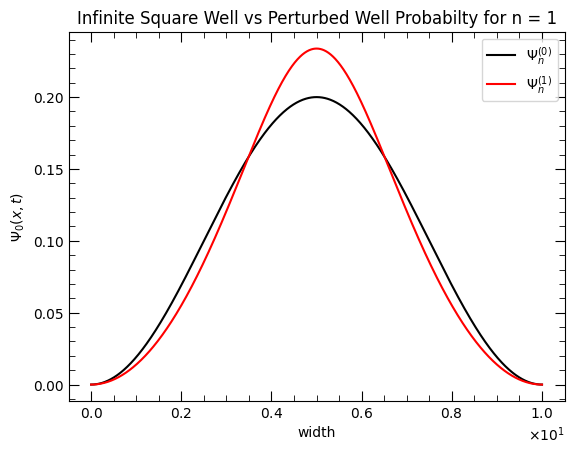

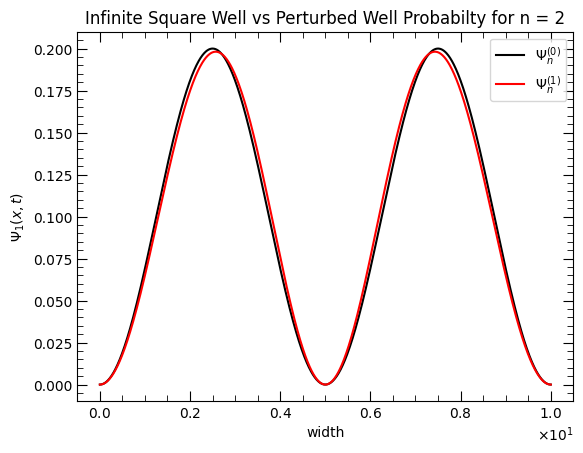

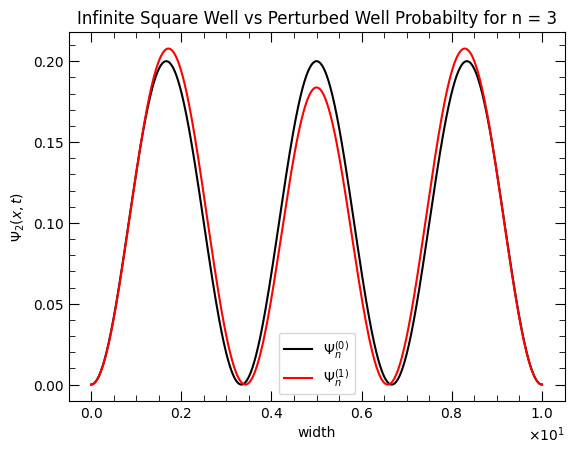

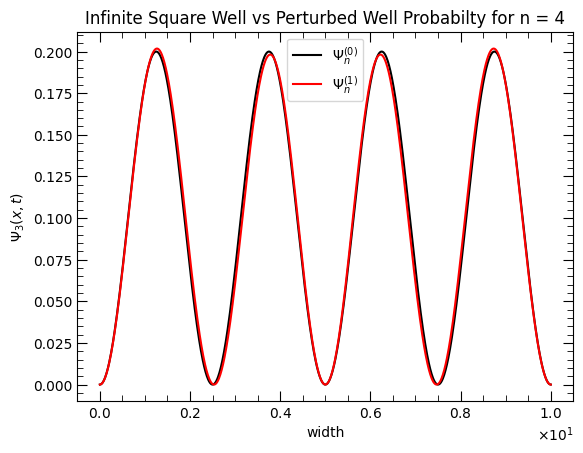

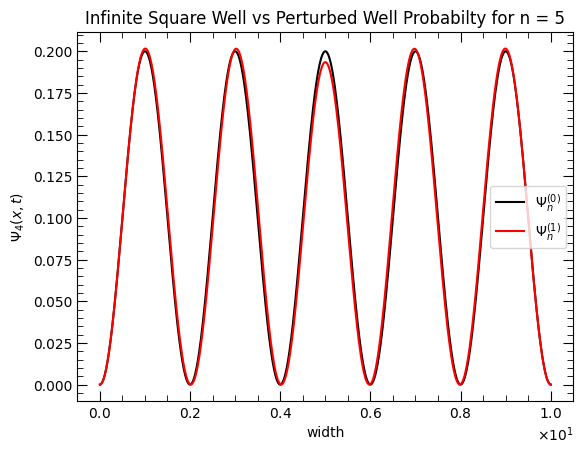

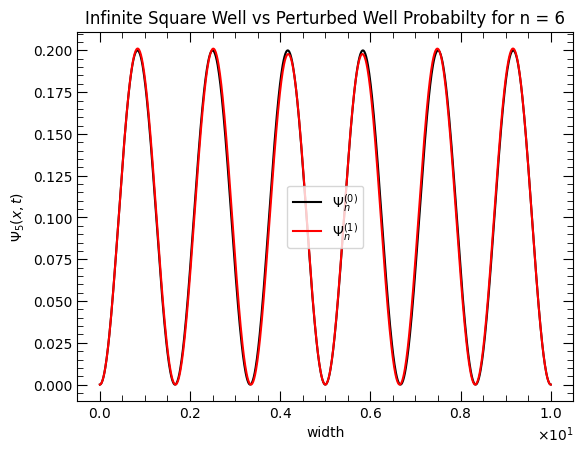

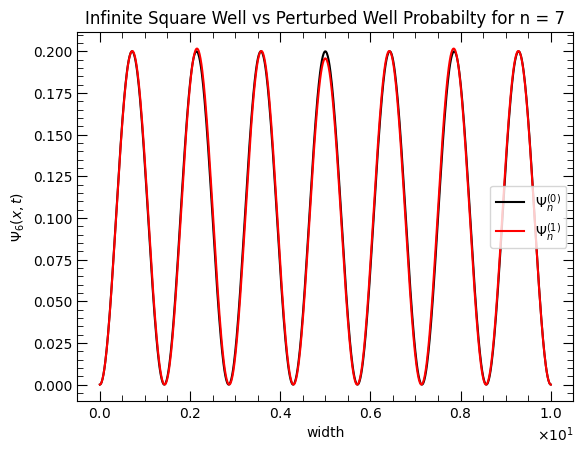

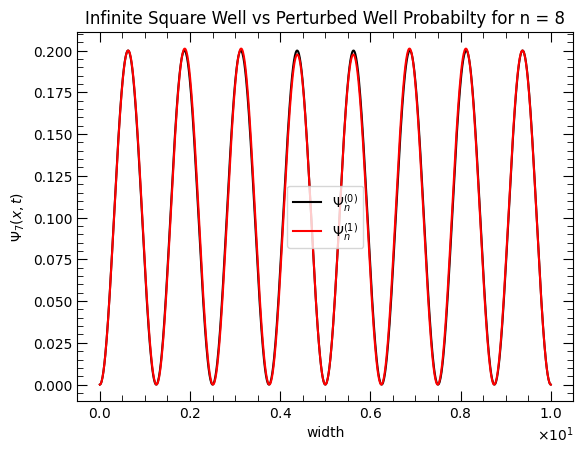

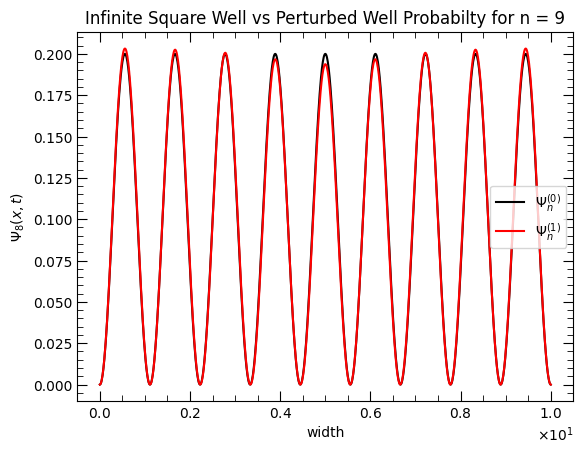

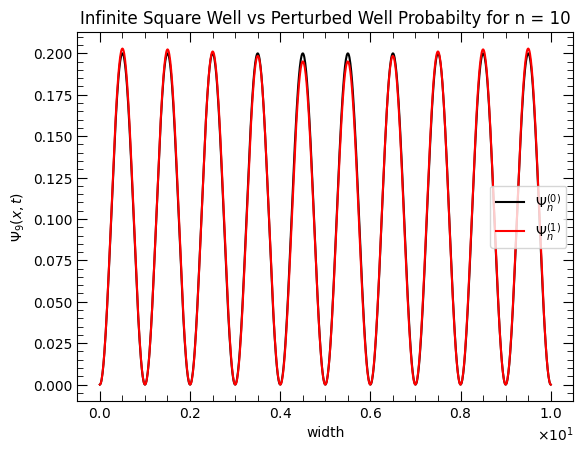

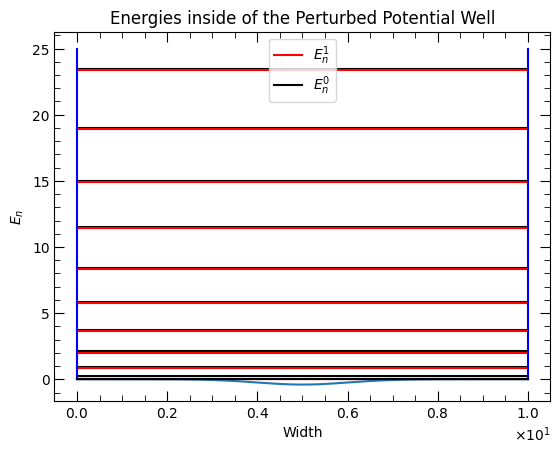

0

In [193]:
# Width of the potential well #
wellWidth = 10
x = np.linspace(0, wellWidth, 1000)


# Generate the potential and wavefunction #
wavefunction = GetWaveFn(x, wellWidth)

widthOfPotential = 1 # Width of Gaussian Perturbed Potential 
PotentialShift = 5      # Position (Left or Right of Origin) of Gaussian Perturbed Potential
potential = -1 / (widthOfPotential * np.sqrt(2*np.pi)) * np.exp(-(x-PotentialShift)**2 / (2 * widthOfPotential**2))


# Get the energy and first order corrected energy, add them for the total new energy #
energy = GetEnergies(wellWidth)
energy_firstOrder = EnergyCorrection(wavefunction, potential, x)
corrected_energy = energy + energy_firstOrder


# Find the corrected wavefunction
wavefunction_firstOrder = GetWaveCorrection(wavefunction, x, potential, energy)
corrected_wavefunction = []
for i in range(0, 10):
    corrected_wavefunction.append(wavefunction_firstOrder[i] + wavefunction[i])


# Normalize #
for i in range(1, 10):
    corrected_wavefunction[i] = corrected_wavefunction[i] / (np.sqrt(np.trapz(corrected_wavefunction[i]**2, x)))


# Get Probability Distributions #
waveFnProb = []
CorrectedWaveFnProb = []
for i in range(0, 10):
    waveFnProb.append(wavefunction[i]**2)
    CorrectedWaveFnProb.append(corrected_wavefunction[i]**2)


# Create Wavefunction Graphs #
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Wavefunction for n = {i+1}',
        x,
        wavefunction[i],
        'black',
        corrected_wavefunction[i],
        'red',
        r'$\psi_n^{(0)}$',
        r'$\psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )


# Create Probability Density Graphs
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Probabilty for n = {i+1}',
        x,
        waveFnProb[i],
        'black',
        CorrectedWaveFnProb[i],
        'red',
        r'$\Psi_n^{(0)}$',
        r'$\Psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )


# Create Energy Graph #
MakeEnergyGraph(x, energy, corrected_energy, potential)

We can also experiment with other potentials of our choice. For example, we can take the potential:
$$
V(x) = -\sqrt{x}
$$
And we end up with a very different set of perterbations.

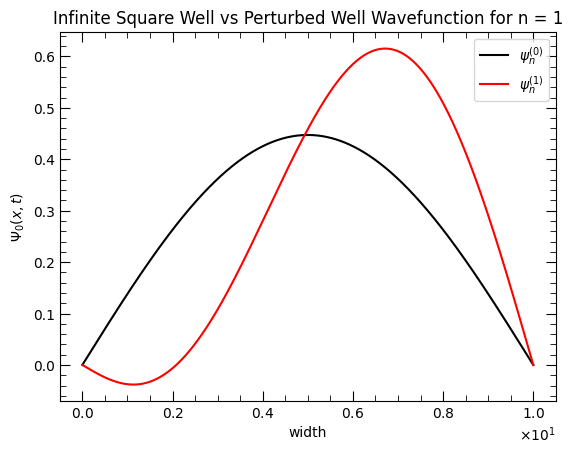

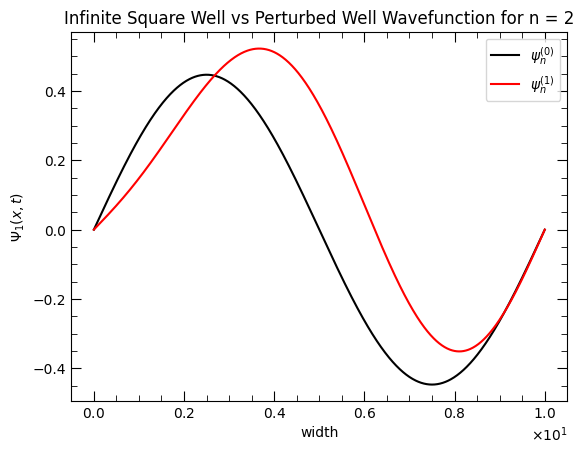

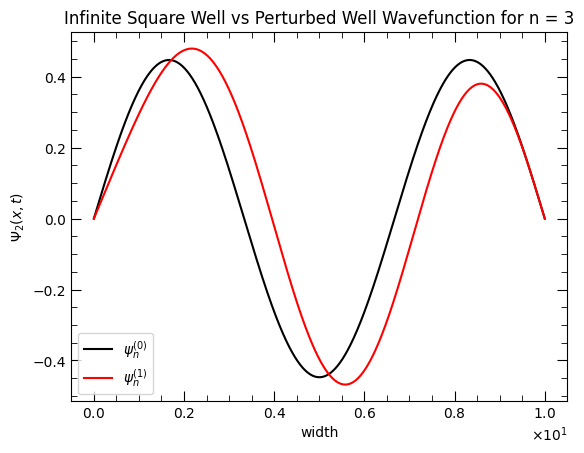

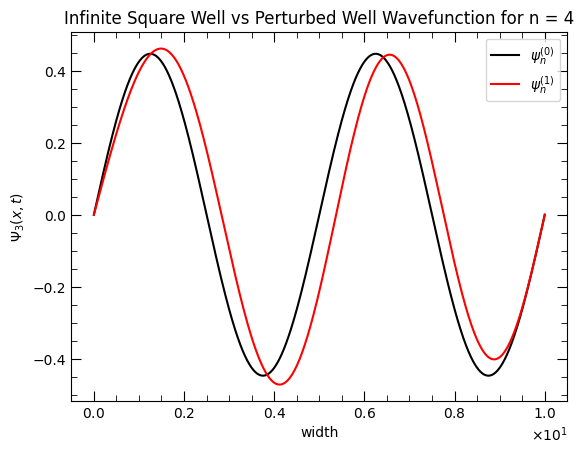

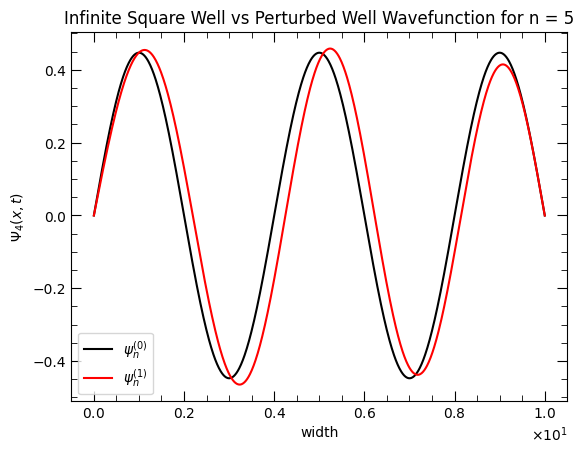

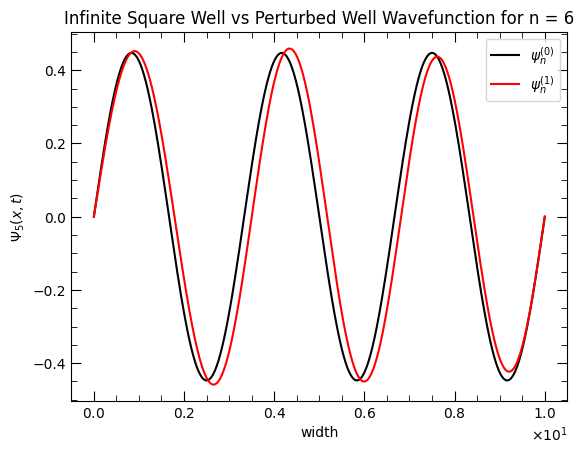

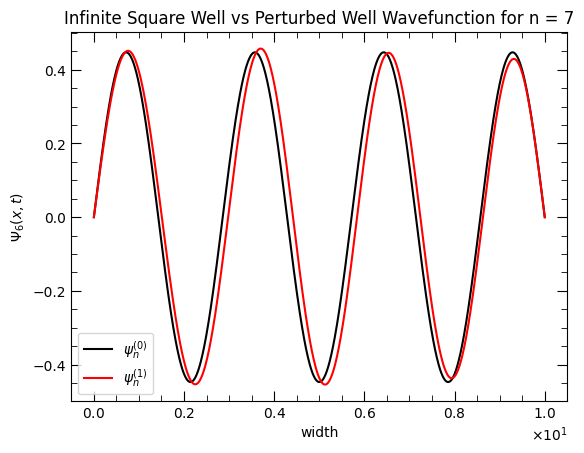

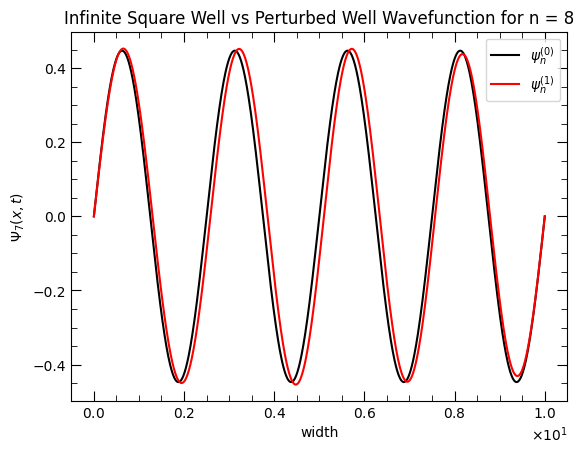

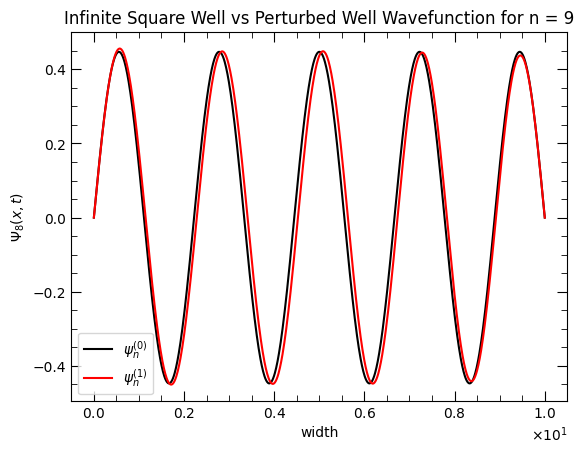

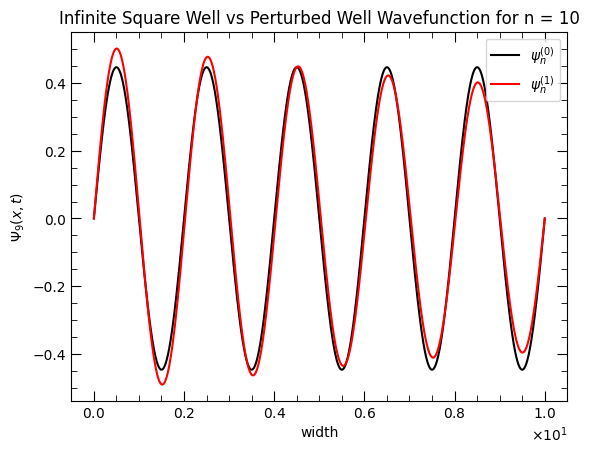

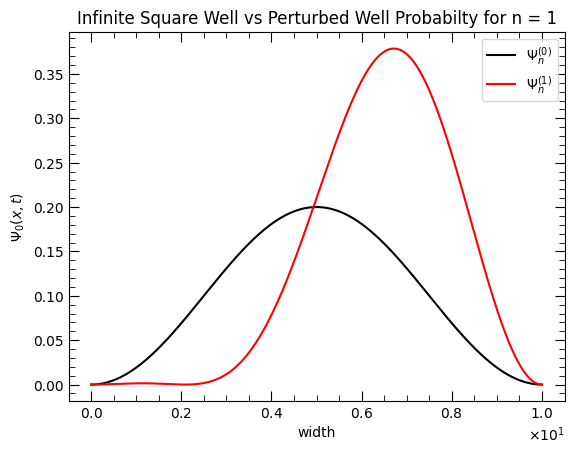

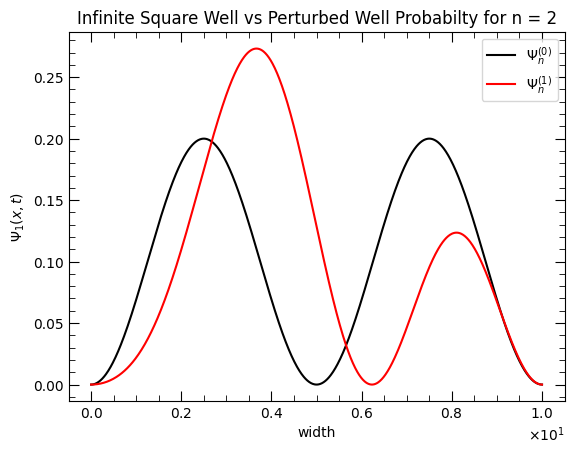

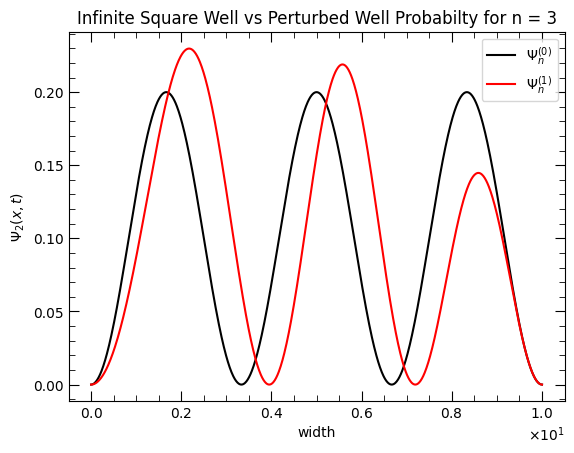

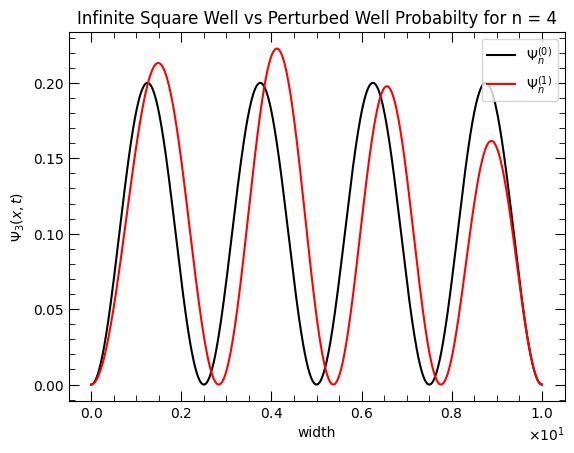

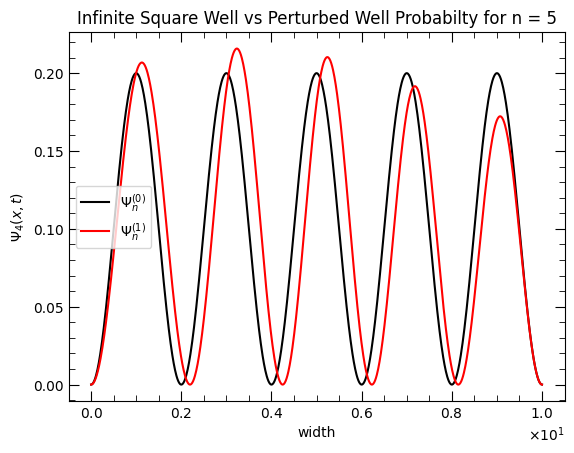

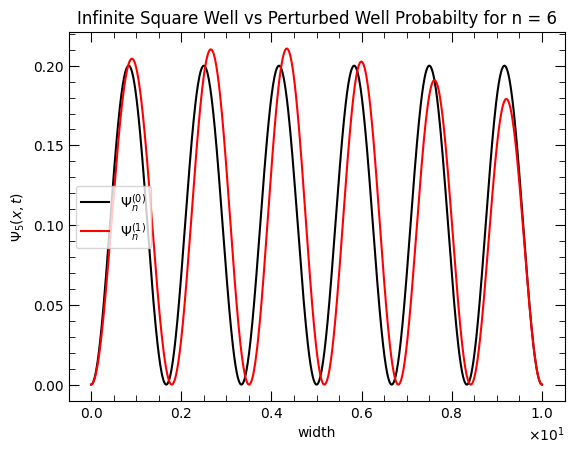

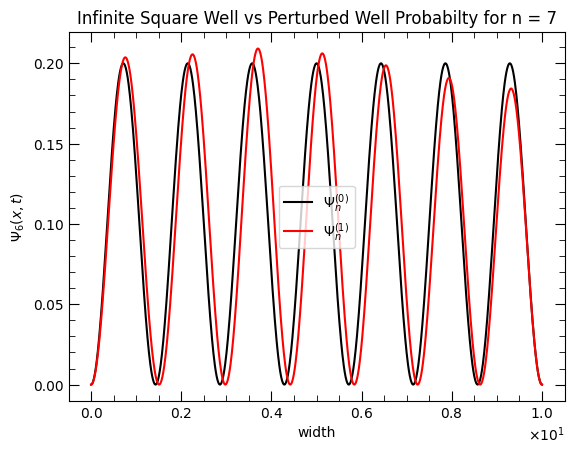

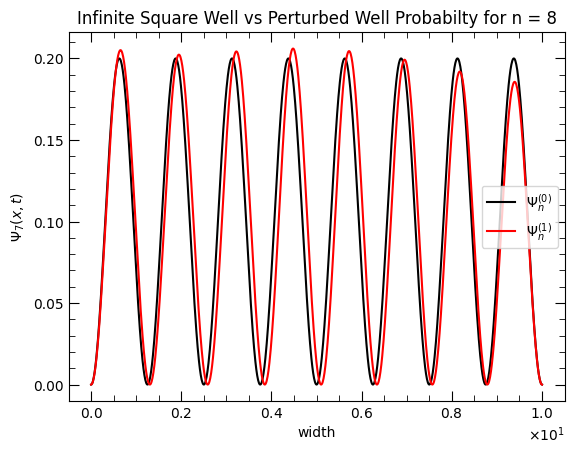

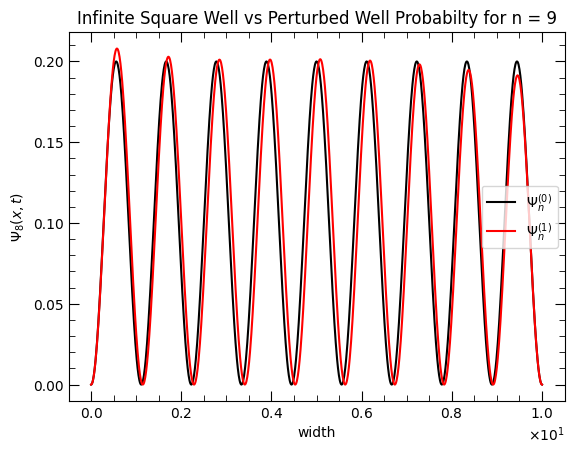

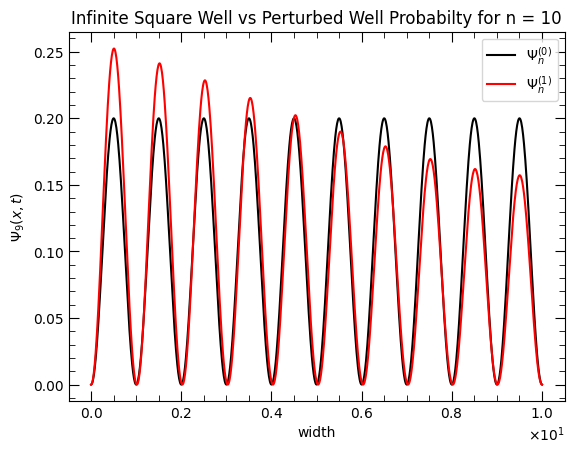

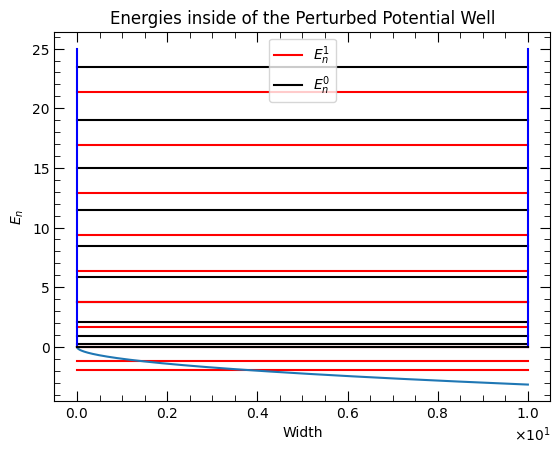

0

In [194]:
# Width of the potential well #
wellWidth = 10
x = np.linspace(0, wellWidth, 1000)


# Generate the potential and wavefunction #
wavefunction = GetWaveFn(x, wellWidth)

# New Potential
potential = -1 * np.sqrt(x)


# Get the energy and first order corrected energy, add them for the total new energy #
energy = GetEnergies(wellWidth)
energy_firstOrder = EnergyCorrection(wavefunction, potential, x)
corrected_energy = energy + energy_firstOrder


# Find the corrected wavefunction
wavefunction_firstOrder = GetWaveCorrection(wavefunction, x, potential, energy)
corrected_wavefunction = []
for i in range(0, 10):
    corrected_wavefunction.append(wavefunction_firstOrder[i] + wavefunction[i])


# Normalize #
for i in range(1, 10):
    corrected_wavefunction[i] = corrected_wavefunction[i] / (np.sqrt(np.trapz(corrected_wavefunction[i]**2, x)))


# Get Probability Distributions #
waveFnProb = []
CorrectedWaveFnProb = []
for i in range(0, 10):
    waveFnProb.append(wavefunction[i]**2)
    CorrectedWaveFnProb.append(corrected_wavefunction[i]**2)


# Create Wavefunction Graphs #
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Wavefunction for n = {i+1}',
        x,
        wavefunction[i],
        'black',
        corrected_wavefunction[i],
        'red',
        r'$\psi_n^{(0)}$',
        r'$\psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )


# Create Probability Density Graphs
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Probabilty for n = {i+1}',
        x,
        waveFnProb[i],
        'black',
        CorrectedWaveFnProb[i],
        'red',
        r'$\Psi_n^{(0)}$',
        r'$\Psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )


# Create Energy Graph #
MakeEnergyGraph(x, energy, corrected_energy, potential)

I will also include a few other interesting functions for proof of concept, and for fun.
$$
\begin{align*}
    V(x) &= -x \\
    V(x) &= \sin(2x) \\
    V(x) &= -\log(x)
\end{align*}
$$

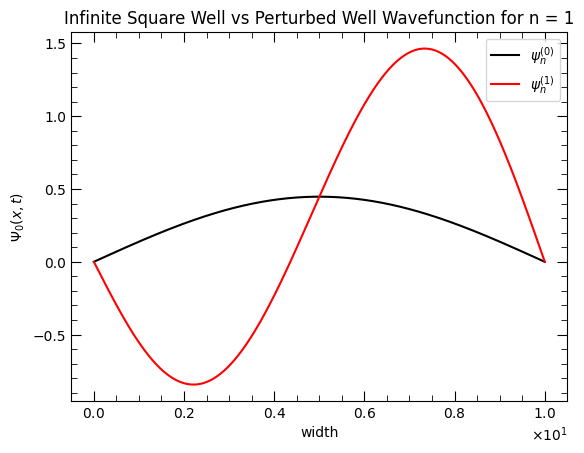

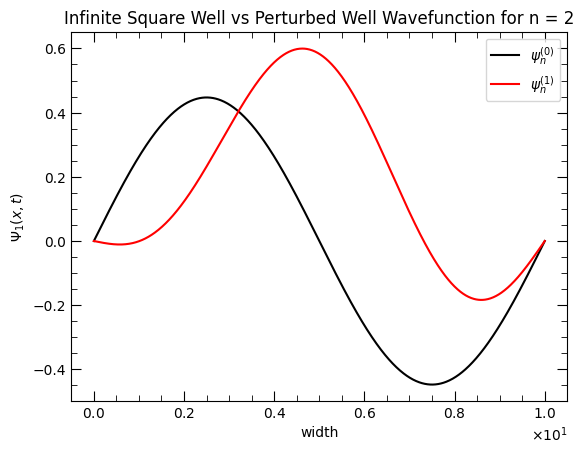

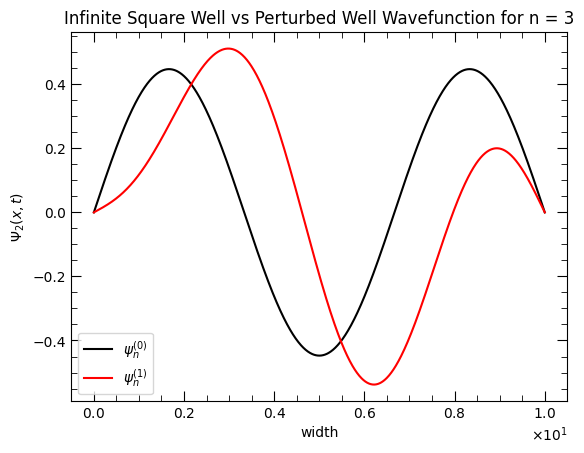

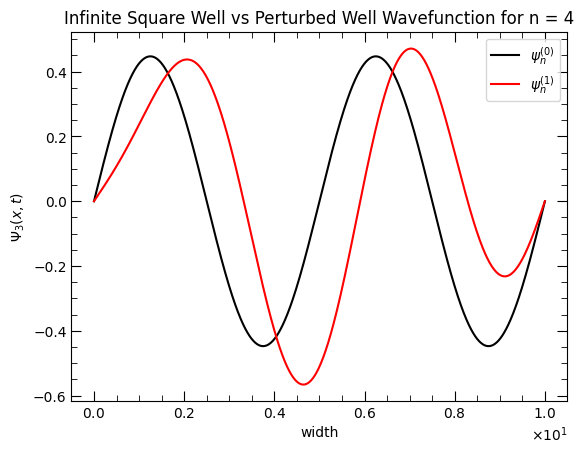

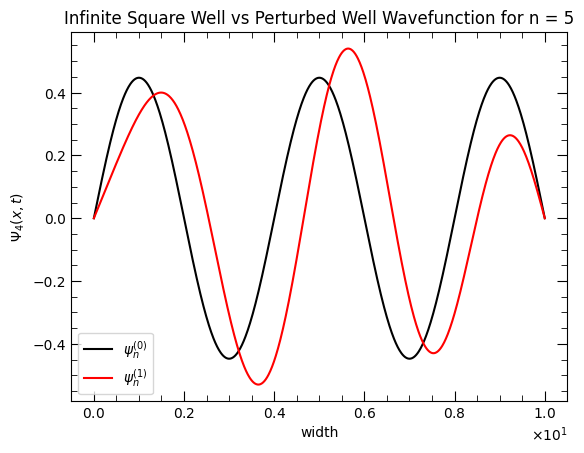

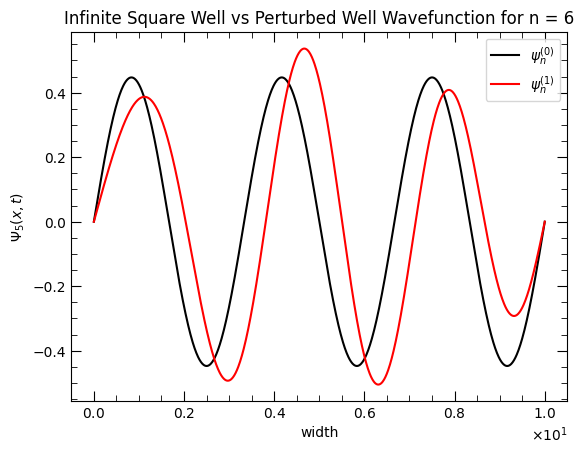

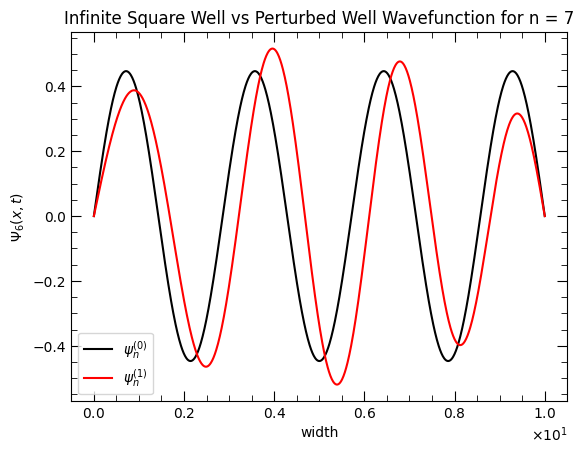

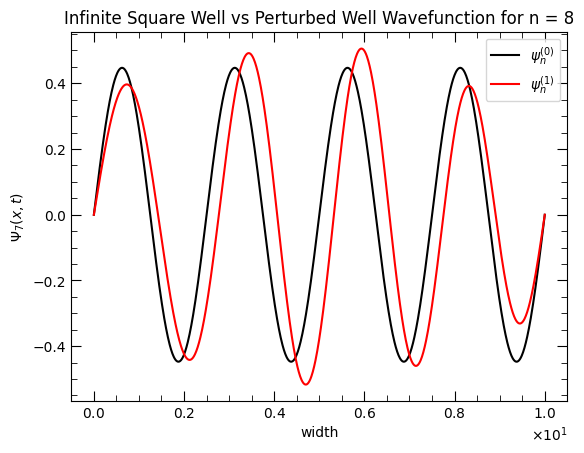

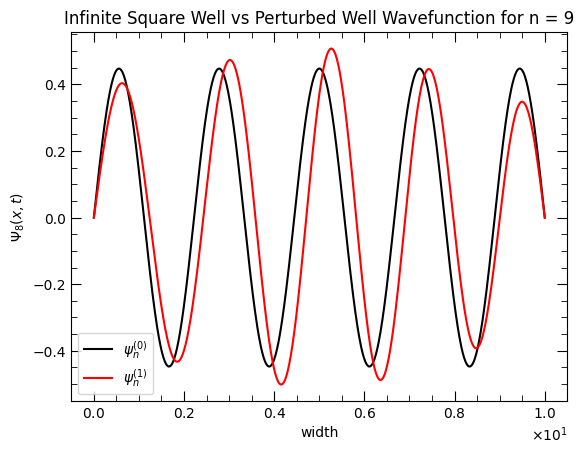

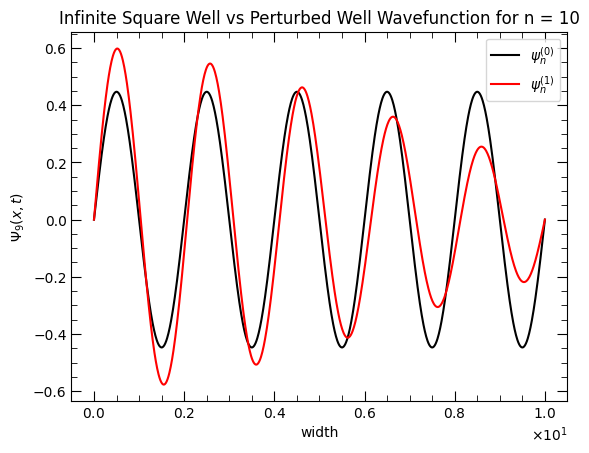

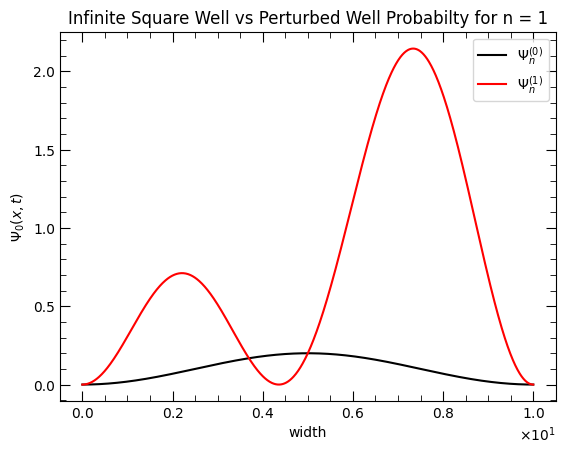

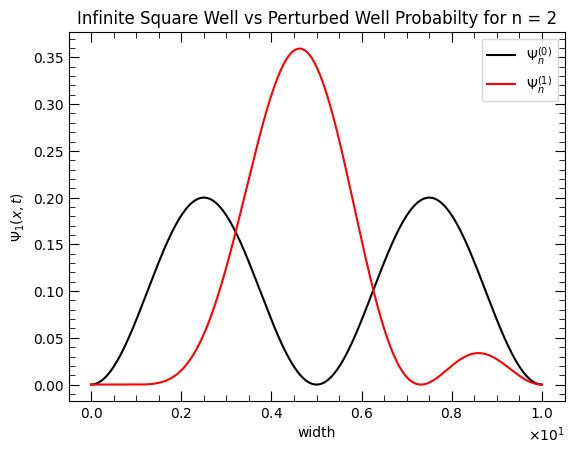

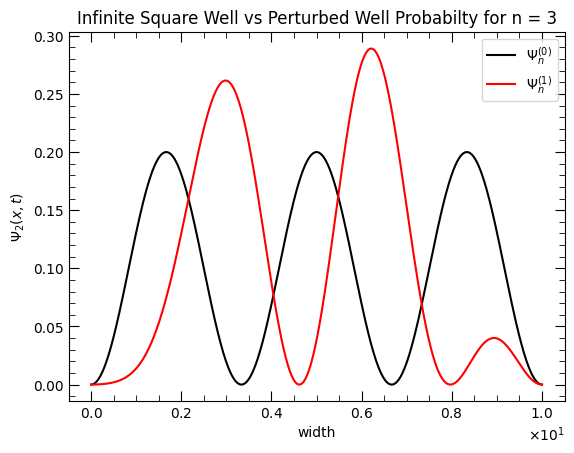

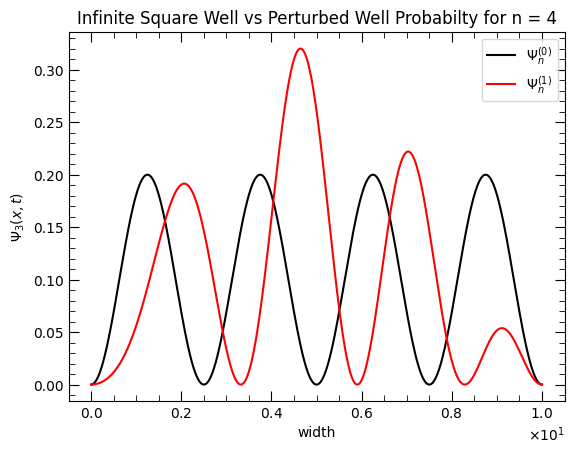

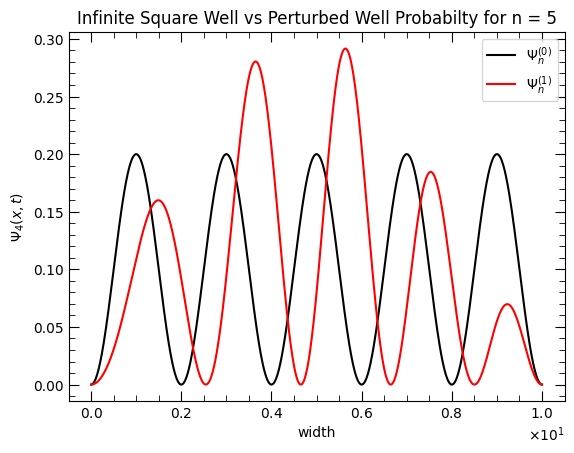

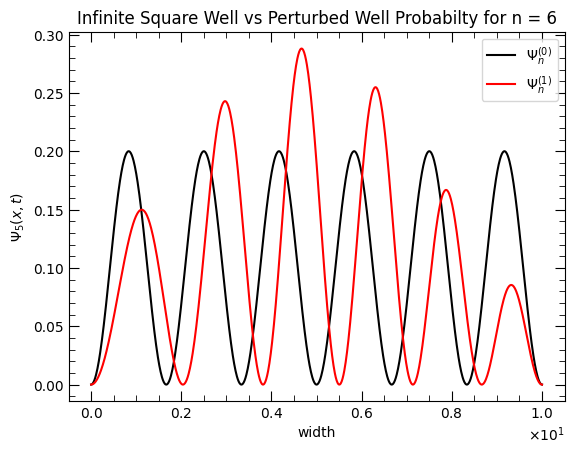

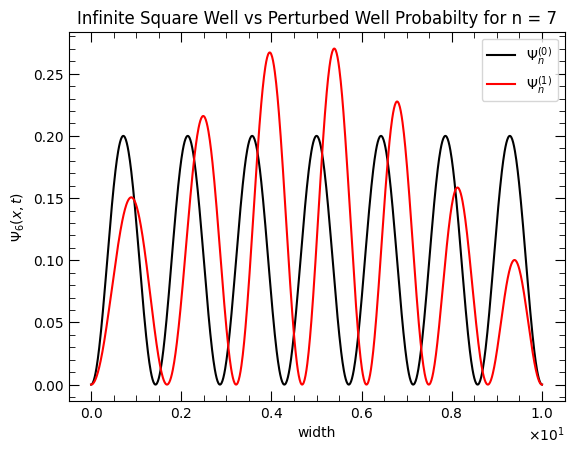

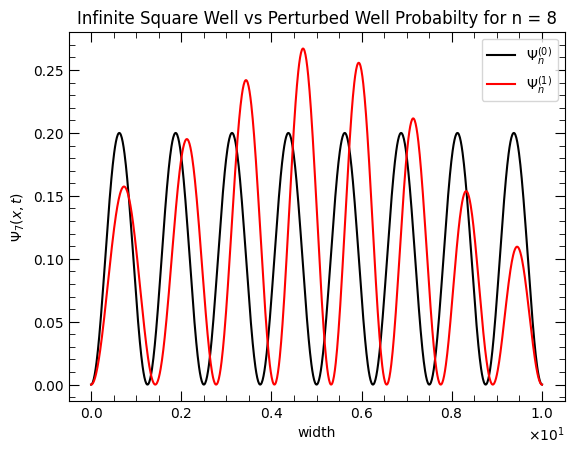

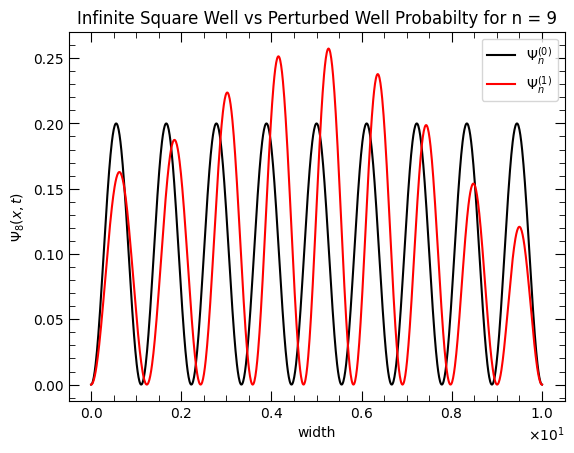

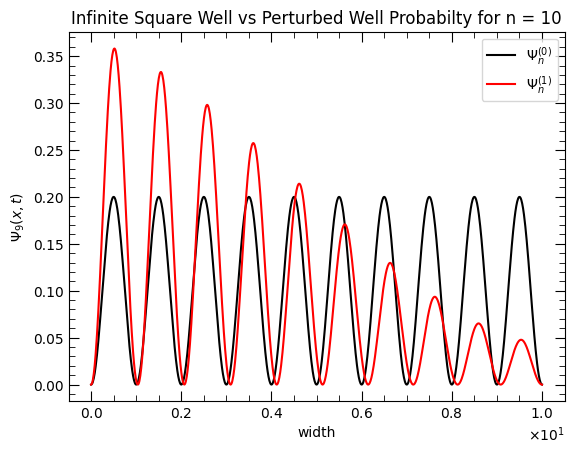

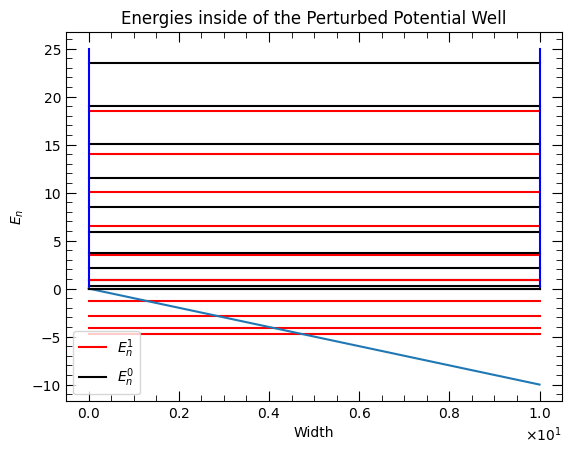

0

In [195]:
# Width of the potential well #
wellWidth = 10
x = np.linspace(0, wellWidth, 1000)


# Generate the potential and wavefunction #
wavefunction = GetWaveFn(x, wellWidth)

# -x
potential = -x


# Get the energy and first order corrected energy, add them for the total new energy #
energy = GetEnergies(wellWidth)
energy_firstOrder = EnergyCorrection(wavefunction, potential, x)
corrected_energy = energy + energy_firstOrder


# Find the corrected wavefunction
wavefunction_firstOrder = GetWaveCorrection(wavefunction, x, potential, energy)
corrected_wavefunction = []
for i in range(0, 10):
    corrected_wavefunction.append(wavefunction_firstOrder[i] + wavefunction[i])


# Normalize #
for i in range(1, 10):
    corrected_wavefunction[i] = corrected_wavefunction[i] / (np.sqrt(np.trapz(corrected_wavefunction[i]**2, x)))


# Get Probability Distributions #
waveFnProb = []
CorrectedWaveFnProb = []
for i in range(0, 10):
    waveFnProb.append(wavefunction[i]**2)
    CorrectedWaveFnProb.append(corrected_wavefunction[i]**2)


# Create Wavefunction Graphs #
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Wavefunction for n = {i+1}',
        x,
        wavefunction[i],
        'black',
        corrected_wavefunction[i],
        'red',
        r'$\psi_n^{(0)}$',
        r'$\psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )


# Create Probability Density Graphs
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Probabilty for n = {i+1}',
        x,
        waveFnProb[i],
        'black',
        CorrectedWaveFnProb[i],
        'red',
        r'$\Psi_n^{(0)}$',
        r'$\Psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )


# Create Energy Graph #
MakeEnergyGraph(x, energy, corrected_energy, potential)

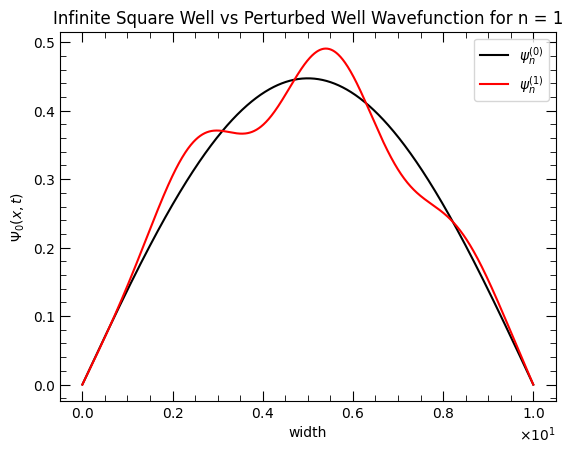

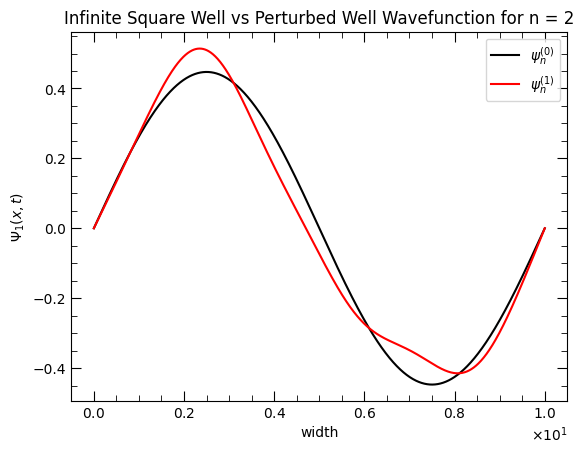

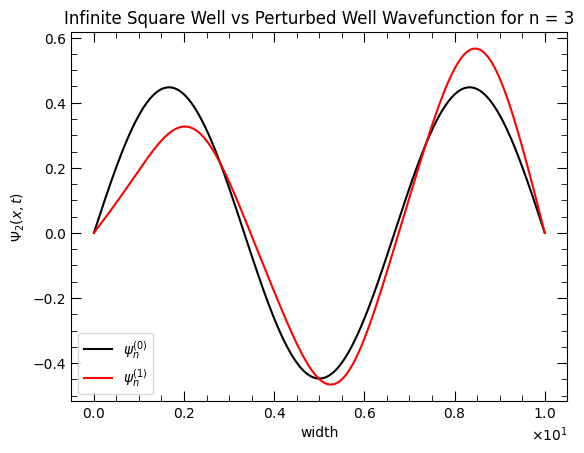

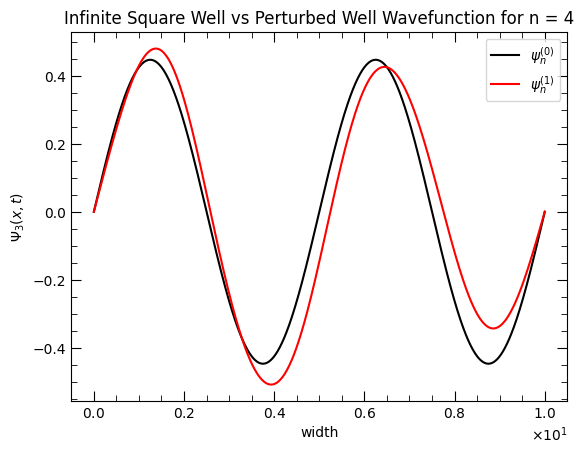

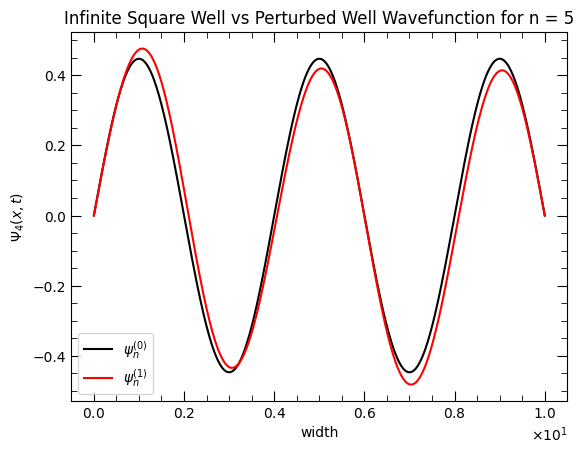

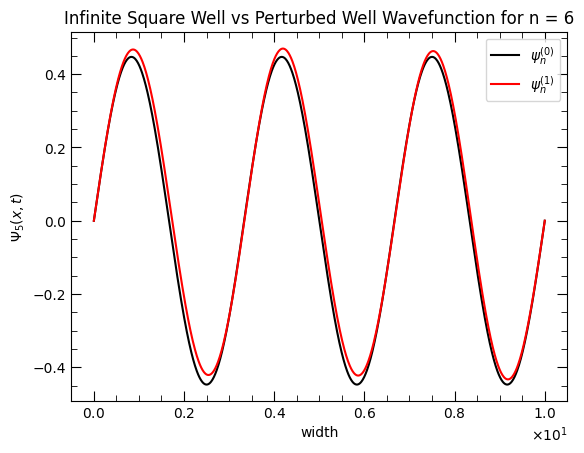

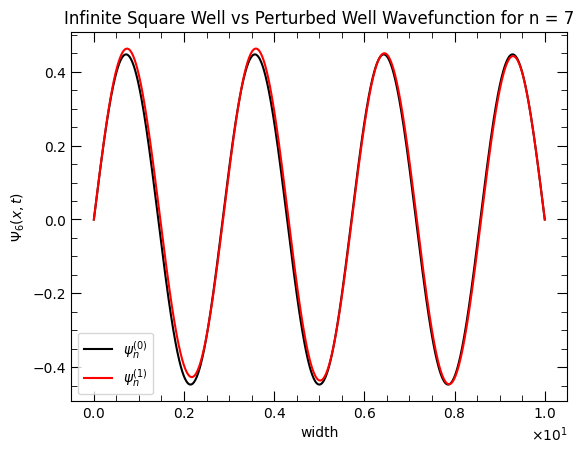

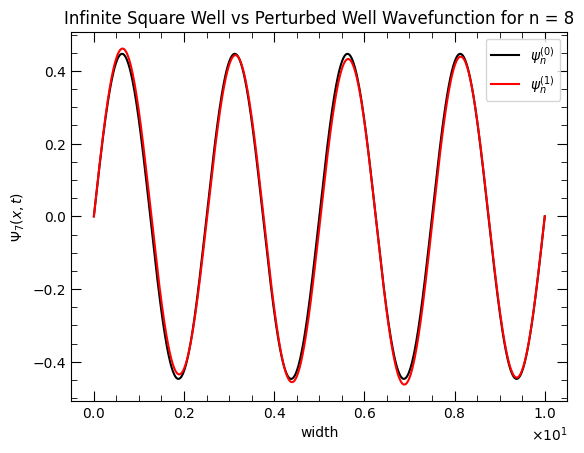

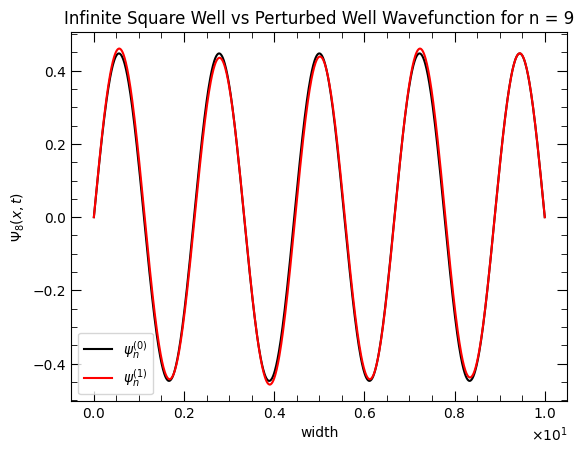

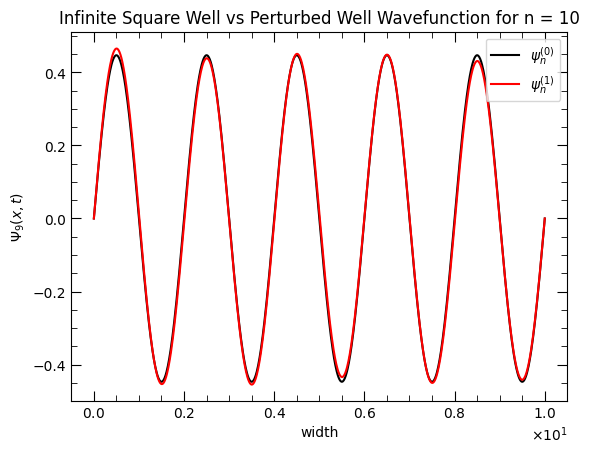

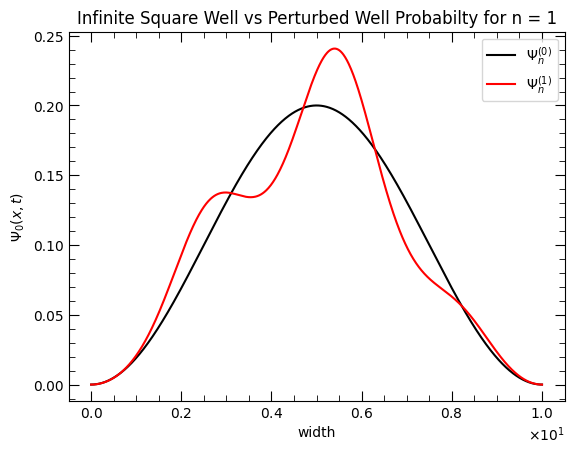

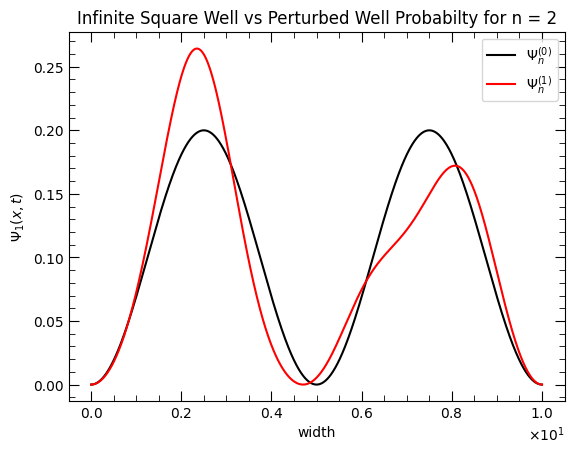

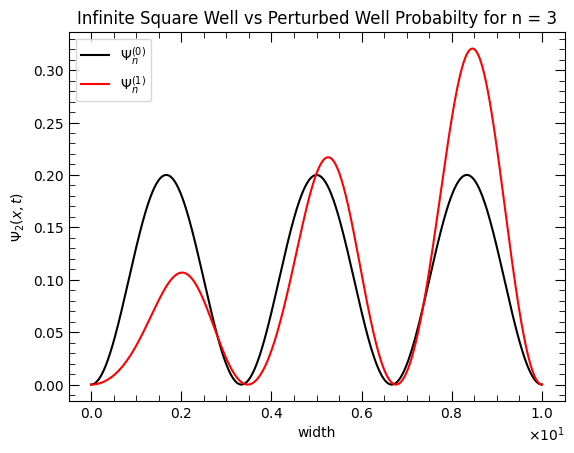

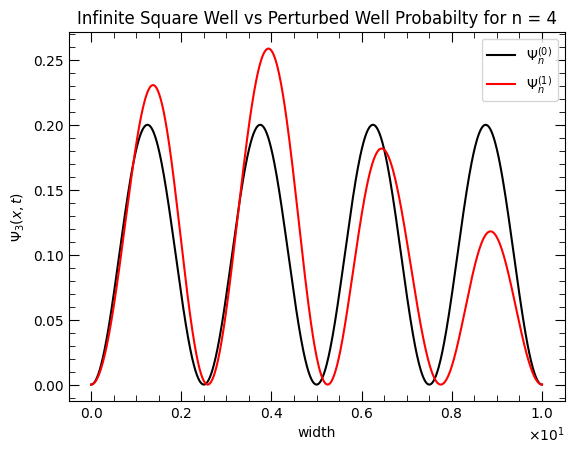

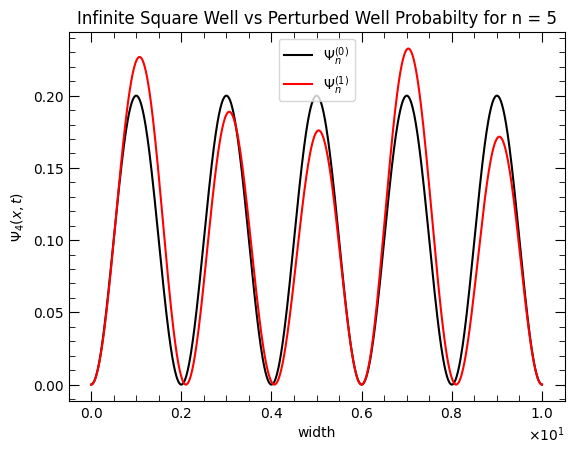

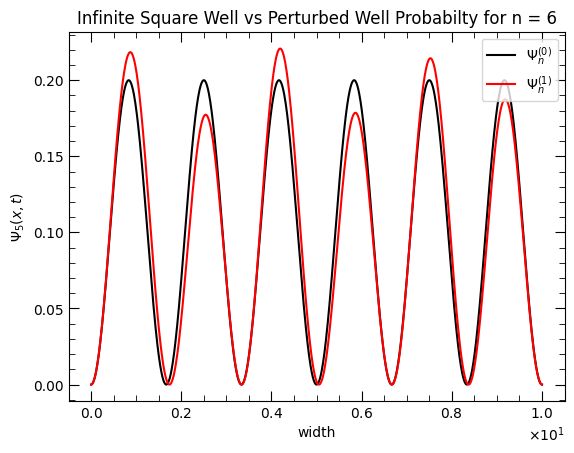

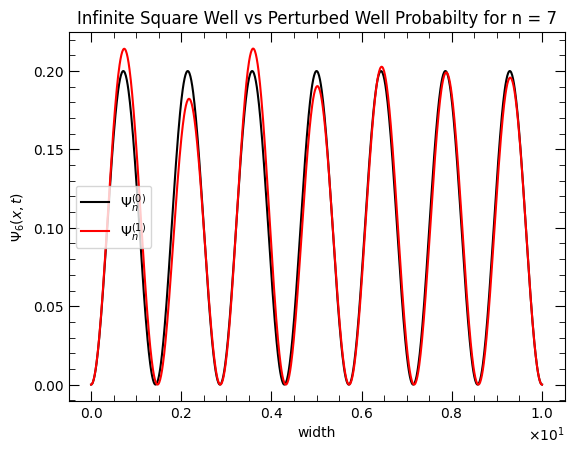

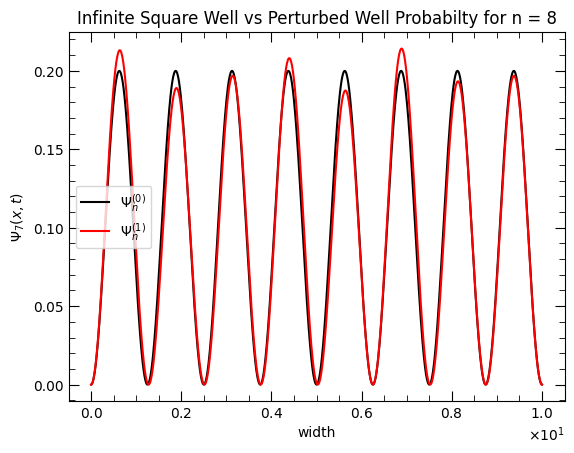

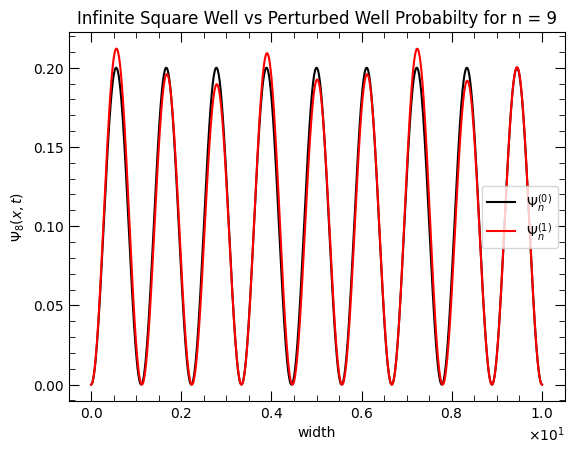

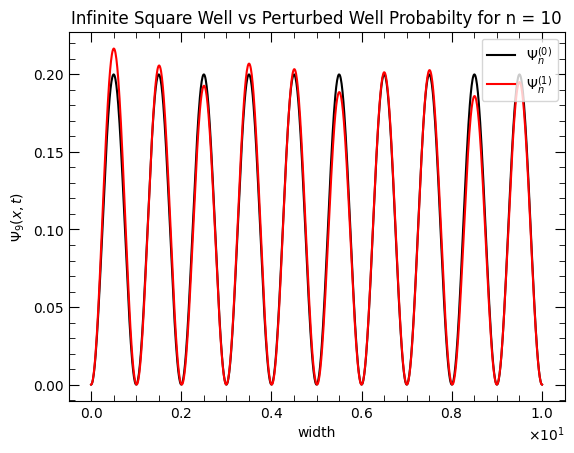

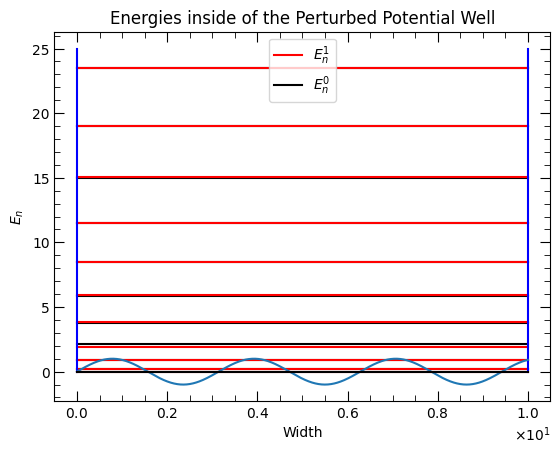

0

In [196]:
# Width of the potential well #
wellWidth = 10
x = np.linspace(0, wellWidth, 1000)


# Generate the potential and wavefunction #
wavefunction = GetWaveFn(x, wellWidth)

# sin(2x)
potential = np.sin(2*x)


# Get the energy and first order corrected energy, add them for the total new energy #
energy = GetEnergies(wellWidth)
energy_firstOrder = EnergyCorrection(wavefunction, potential, x)
corrected_energy = energy + energy_firstOrder


# Find the corrected wavefunction
wavefunction_firstOrder = GetWaveCorrection(wavefunction, x, potential, energy)
corrected_wavefunction = []
for i in range(0, 10):
    corrected_wavefunction.append(wavefunction_firstOrder[i] + wavefunction[i])


# Normalize #
for i in range(1, 10):
    corrected_wavefunction[i] = corrected_wavefunction[i] / (np.sqrt(np.trapz(corrected_wavefunction[i]**2, x)))


# Get Probability Distributions #
waveFnProb = []
CorrectedWaveFnProb = []
for i in range(0, 10):
    waveFnProb.append(wavefunction[i]**2)
    CorrectedWaveFnProb.append(corrected_wavefunction[i]**2)


# Create Wavefunction Graphs #
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Wavefunction for n = {i+1}',
        x,
        wavefunction[i],
        'black',
        corrected_wavefunction[i],
        'red',
        r'$\psi_n^{(0)}$',
        r'$\psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )


# Create Probability Density Graphs
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Probabilty for n = {i+1}',
        x,
        waveFnProb[i],
        'black',
        CorrectedWaveFnProb[i],
        'red',
        r'$\Psi_n^{(0)}$',
        r'$\Psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )


# Create Energy Graph #
MakeEnergyGraph(x, energy, corrected_energy, potential)

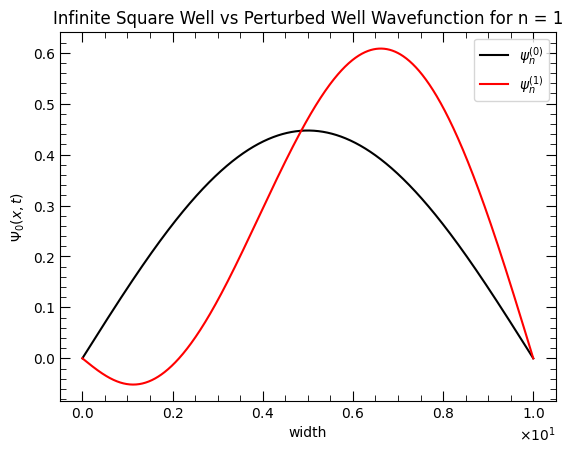

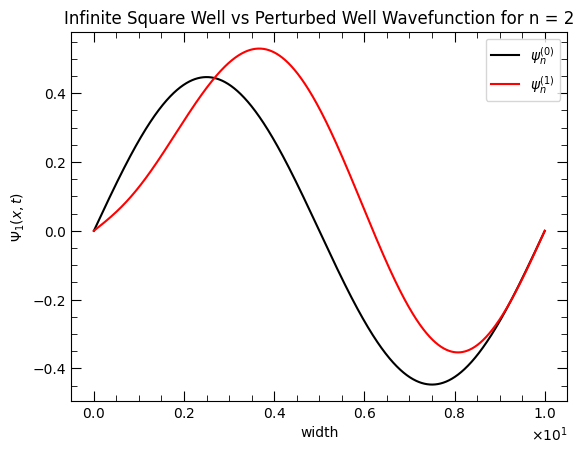

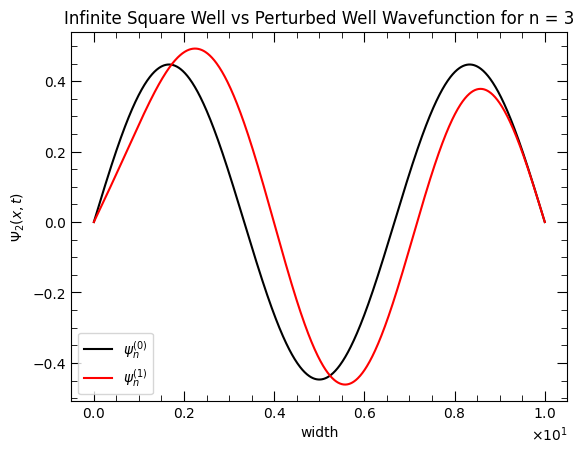

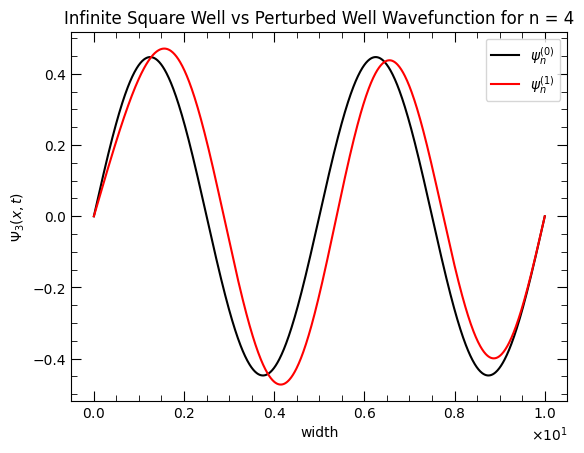

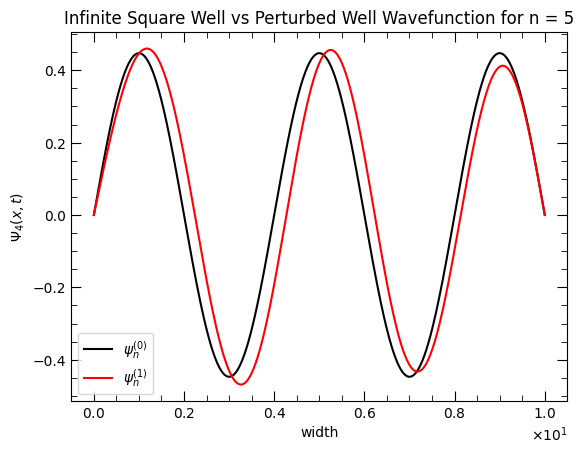

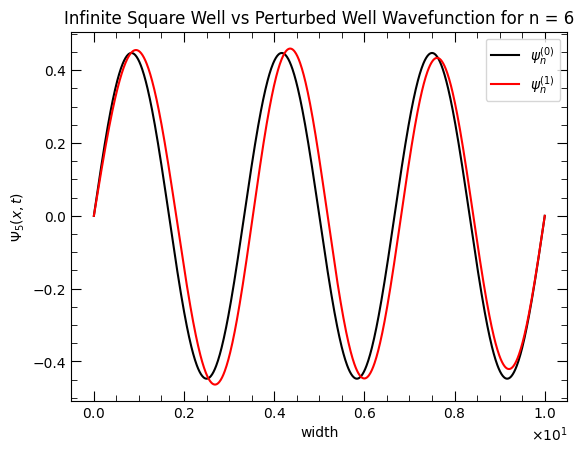

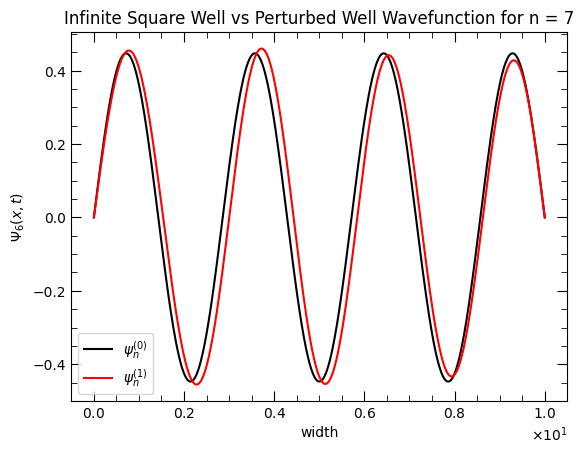

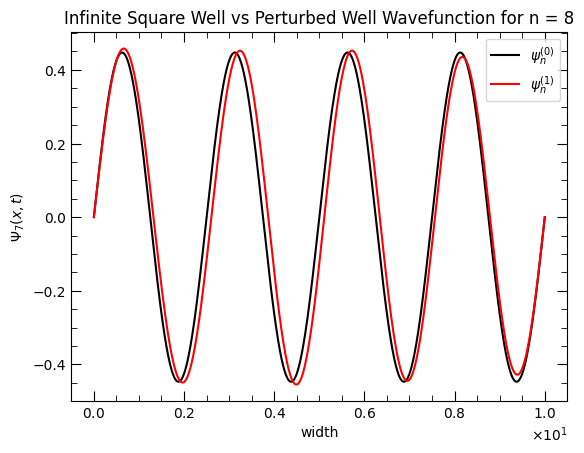

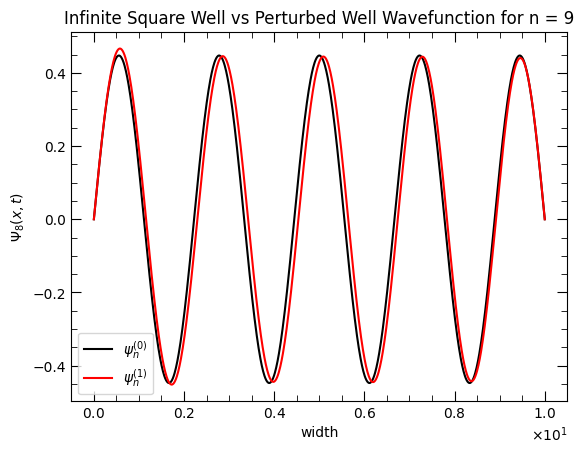

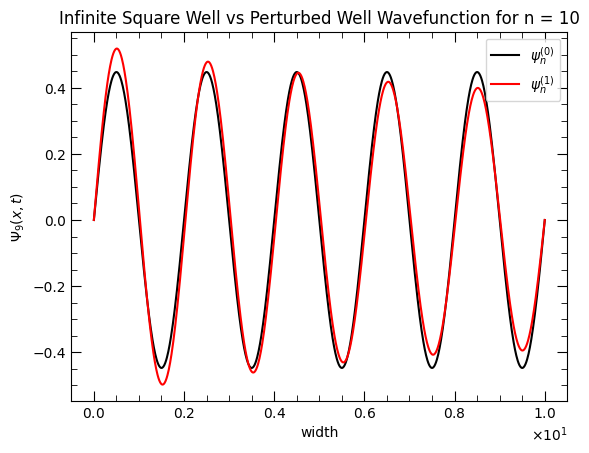

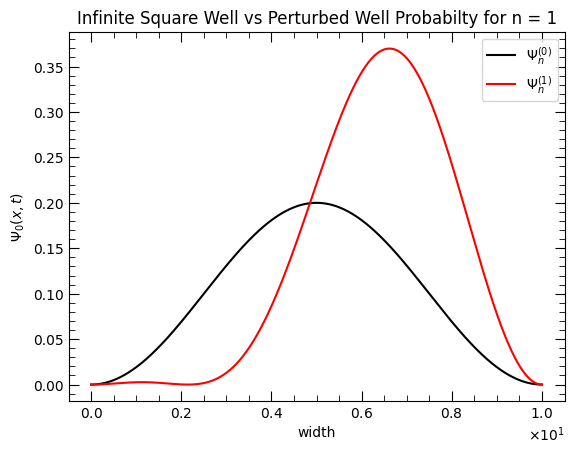

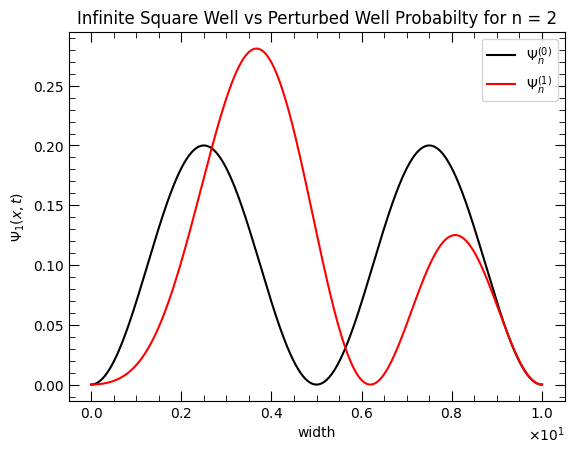

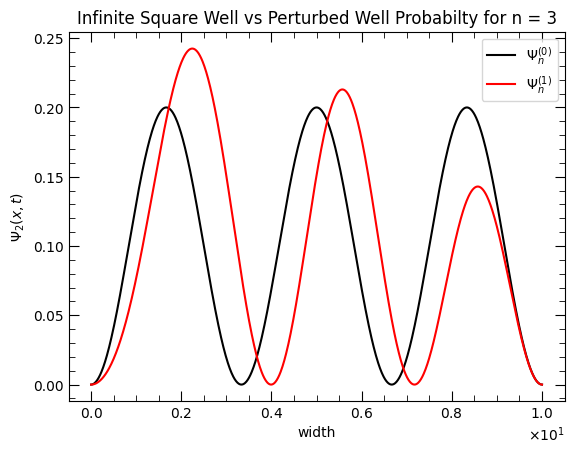

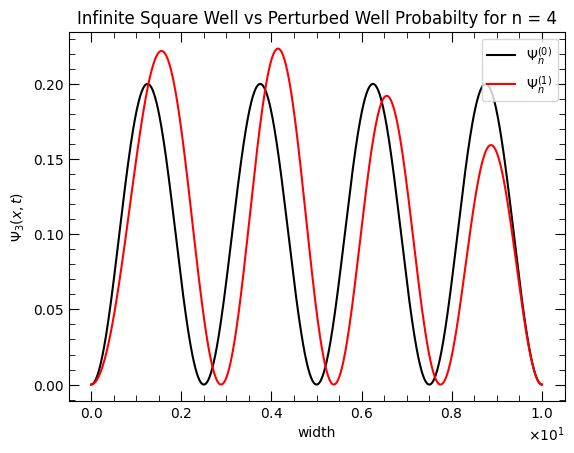

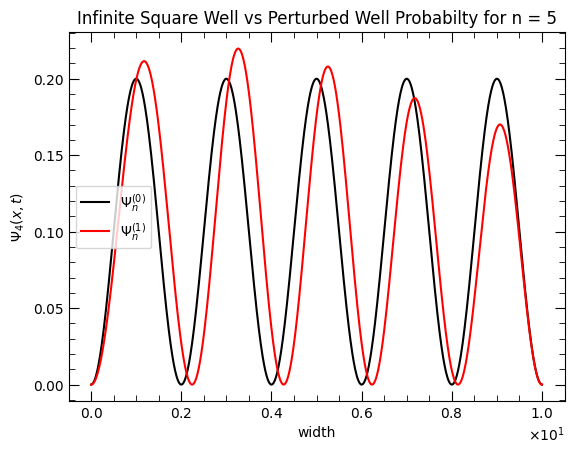

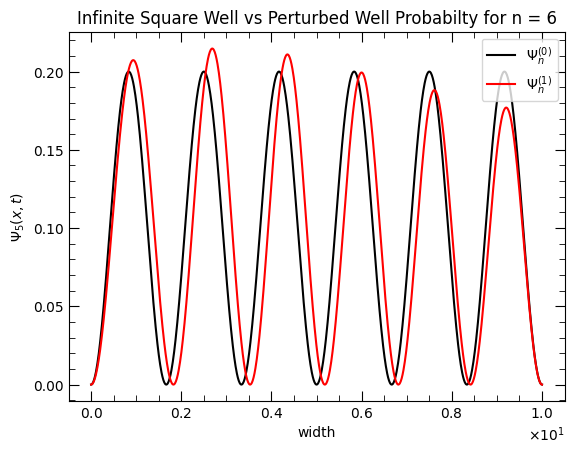

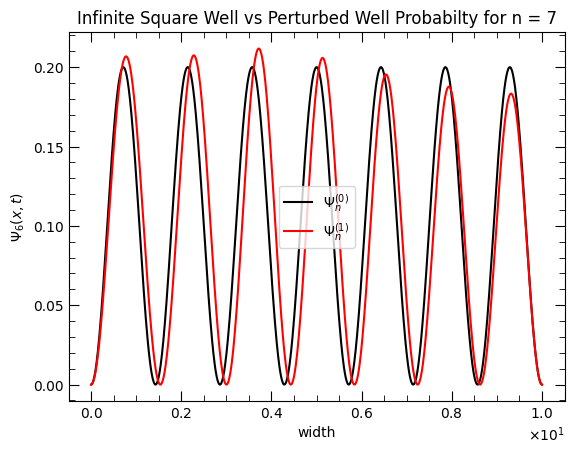

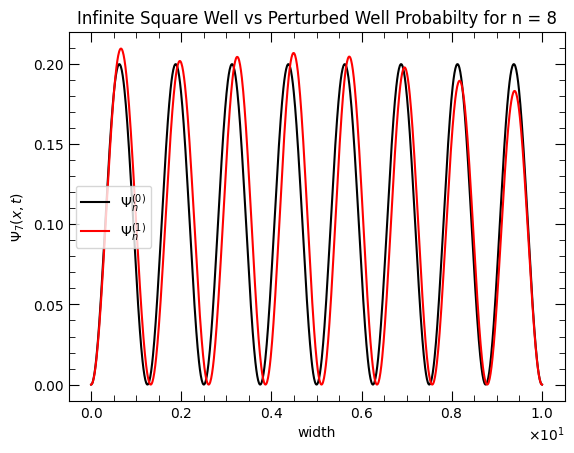

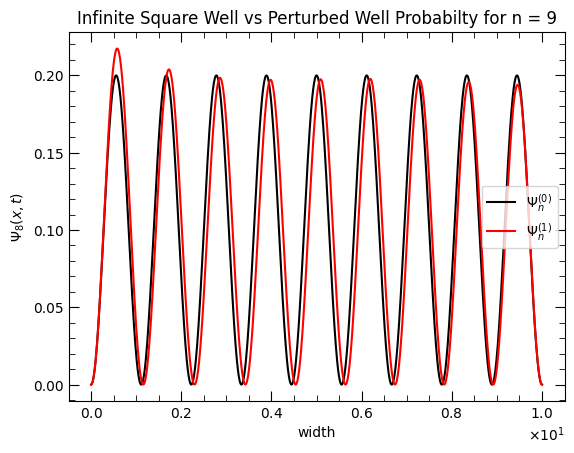

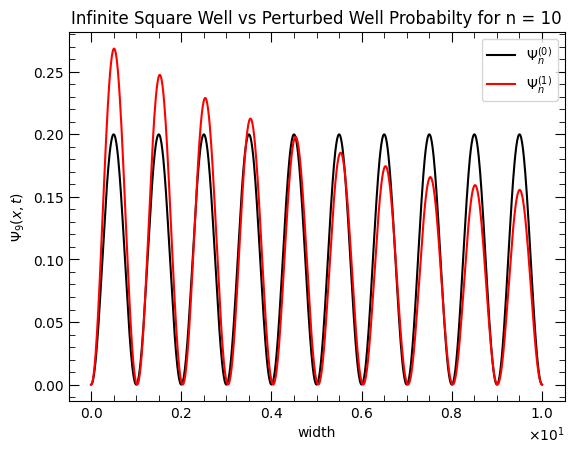

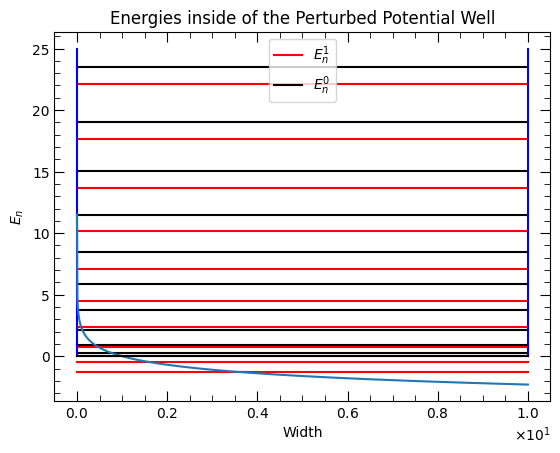

0

In [197]:
# Width of the potential well #
wellWidth = 10
x = np.linspace(0, wellWidth, 1000)


# Generate the potential and wavefunction #
wavefunction = GetWaveFn(x, wellWidth)

# -log(x)
potential = - np.log(x+0.00001) #Adjust slightly to avoid undefined behavior at log(0)


# Get the energy and first order corrected energy, add them for the total new energy #
energy = GetEnergies(wellWidth)
energy_firstOrder = EnergyCorrection(wavefunction, potential, x)
corrected_energy = energy + energy_firstOrder


# Find the corrected wavefunction
wavefunction_firstOrder = GetWaveCorrection(wavefunction, x, potential, energy)
corrected_wavefunction = []
for i in range(0, 10):
    corrected_wavefunction.append(wavefunction_firstOrder[i] + wavefunction[i])


# Normalize #
for i in range(1, 10):
    corrected_wavefunction[i] = corrected_wavefunction[i] / (np.sqrt(np.trapz(corrected_wavefunction[i]**2, x)))


# Get Probability Distributions #
waveFnProb = []
CorrectedWaveFnProb = []
for i in range(0, 10):
    waveFnProb.append(wavefunction[i]**2)
    CorrectedWaveFnProb.append(corrected_wavefunction[i]**2)


# Create Wavefunction Graphs #
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Wavefunction for n = {i+1}',
        x,
        wavefunction[i],
        'black',
        corrected_wavefunction[i],
        'red',
        r'$\psi_n^{(0)}$',
        r'$\psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )


# Create Probability Density Graphs
for i in range(0, 10):
    MakeGraph(
        f'Infinite Square Well vs Perturbed Well Probabilty for n = {i+1}',
        x,
        waveFnProb[i],
        'black',
        CorrectedWaveFnProb[i],
        'red',
        r'$\Psi_n^{(0)}$',
        r'$\Psi_n^{(1)}$',
        'width',
        f'$\Psi_{i}(x, t)$'
    )


# Create Energy Graph #
MakeEnergyGraph(x, energy, corrected_energy, potential)

## Discussion ##

#### Wavefunctions ####
Looking at the graphs we can see symmetric behaviour among the perturbed wave functions for $n = 1$ to $n = 10$ for the gaussian perturbation. For all cases shown in the results section, we can see that the amplitude of the wavefunction is directly correlated to the changing potential. As the potential decreases, the amplitude of the wavefunction gets increasingly skewed from the original infinite well solution. As the number of nodes increases, the difference between the perturbed solution and the unperturbed solution seem to decrease. After about $n = 5$, the solution essentially converges to the original solution. Higher frequencies seem to respond to fluctuations less than lower frequency solutions.

#### Probability ####
 The various functions tested above clearly show that the probability graphs peak near the higher potential regions of the well. Creating higher order corrections could be a project of interest for the future, and would provide a deeper insight to the behaviour of these potentials. The project could also be futher expanded for different types of wells. Instead of only considering an infinite square well, we could create different shaped wells or potential cavities and study their perturbations as well. Similarly to the wavefunction graphs, the higher the frequnecy, the more the perturbed solutions converged to the unperturbed case. 

#### Eigenenergies ####
I also have displayed the different energy levels for the system from $n = 1$ to $n = 10$, and have shown that as we decrease the potential to lower and lower values, the corresponding eigenenergies also drop. While I did not produce any potentials in the results of this report that raised the average of the potential well, it can be extrapolated that the eigenenergy solutions should be higher than that of the original well. This would be an interesting area to expand the eigenenergy solutions in this project.


## Conclusion ##
Therefore it is shown that I have successfully implemented a program to calculate the first order corrections for both the eigenenergies and the wavefunctions for a particle in a perturbed infinite well for $n = 1$ to $n = 10$. This program calculates and then provides a visual representation of the wavefunctions, probabilities, and energies and compares them against the known values of the infinite well. This project provides further insight on how particles behave inside of varying potentials and how thier respective energies vary depending on the potential introduced into the system. 

## References ##
Griffiths, D. J., & Schroeter, D. F. (2020). Introduction to quantum mechanics. Cambridge University Press. 